# Trabajo Práctico: Predicciones de Profit (Companie)  y Type (Pokemon)
**Materia:** Minería de Datos (MD)

**Año académico:** 2024

**Período lectivo:** 1° cuatrimestre

**Integrantes:**
- Moresco Brisa
- Britos Julián Francisco

# Librerías

In [136]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text
from sklearn.calibration import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB



# Actividad 1
Descargar el conjunto de datos, 1000_Companies.csv1, para realizar el trabajo práctico.
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de
datos, etc.) y elegir un método de estandarización

### Carga de datos

In [19]:
'''
Contexto:
El conjunto de datos proporcionado consta de los datos de ganancias de la empresa y sus gastos.
'''

file_path= '1000_Companies.csv'
companies = pd.read_csv(file_path, sep=',',engine='python')

# Contenido obtenido de: www.kaggle.com/datasets/subhamp7/company-profit-and-expenditures

### Visualización de datos

Examinaremos los datos para un primer vistazo.

In [20]:
companies

RyD_Spend  Administration  MarketingSpend       State        Profit
0    165349.20      136897.800     471784.1000    New York  192261.83000
1    162597.70      151377.590     443898.5300  California  191792.06000
2    153441.51      101145.550     407934.5400     Florida  191050.39000
3    144372.41      118671.850     383199.6200    New York  182901.99000
4    142107.34       91391.770     366168.4200     Florida  166187.94000
..         ...             ...             ...         ...           ...
995   54135.00      118451.999     173232.6695  California   95279.96251
996  134970.00      130390.080     329204.0228  California  164336.60550
997  100275.47      241926.310     227142.8200  California  413956.48000
998  128456.23      321652.140     281692.3200  California  333962.19000
999  161181.72      270939.860     295442.1700    New York  476485.43000

[1000 rows x 5 columns]

A continuación, examinaremos qué tipos de variables son las columnas.

In [21]:
companies.dtypes

RyD_Spend         float64
Administration    float64
MarketingSpend    float64
State              object
Profit            float64
dtype: object

Investiguemos la presencia de valores nulos en los datos.

In [22]:
companies.isna().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

Vemos si hay valores duplicados

In [23]:
companies[companies.duplicated(keep=False)]

RyD_Spend  Administration  MarketingSpend       State       Profit
335    84533.0     122941.3141     231885.6935  California  121248.7116
755    84533.0     122941.3141     231885.6935  California  121248.7116

Vemos que hay un valor duplicado, este los eliminaremos posteriormente.

Para concluir nuestra primera inspección, veremos las estadísticas descriptivas del conjunto de datos.

In [24]:
companies.describe(include='all')

RyD_Spend  Administration  MarketingSpend       State  \
count     1000.000000     1000.000000     1000.000000        1000   
unique            NaN             NaN             NaN           3   
top               NaN             NaN             NaN  California   
freq              NaN             NaN             NaN         344   
mean     81668.927200   122963.897612   226205.058419         NaN   
std      46537.567891    12613.927535    91578.393542         NaN   
min          0.000000    51283.140000        0.000000         NaN   
25%      43084.500000   116640.684850   150969.584600         NaN   
50%      79936.000000   122421.612150   224517.887350         NaN   
75%     124565.500000   129139.118000   308189.808525         NaN   
max     165349.200000   321652.140000   471784.100000         NaN   

               Profit  
count     1000.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    119546.164656  
std      42888.633848  
min      14681.400000  
25%      85943.198543  
50%     117641.466300  
75%     155577.107425  
max     476485.430000

### Gráficos

#### State

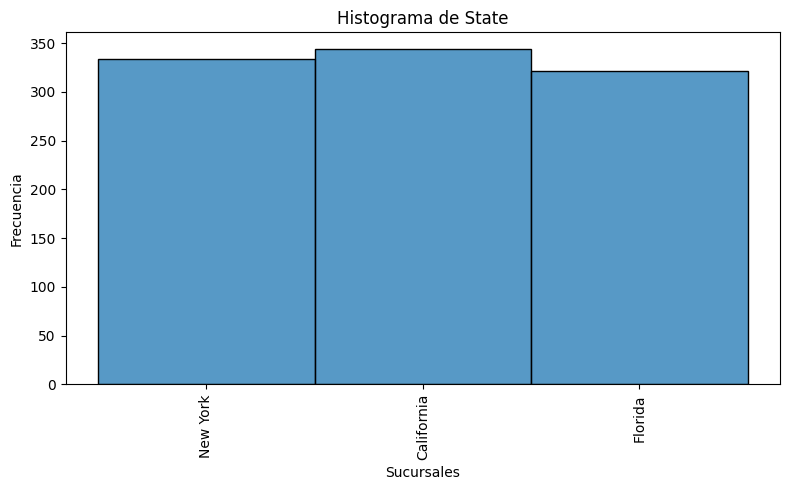

count           1000
unique             3
top       California
freq             344
Name: State, dtype: object

In [25]:
fig, axs = plt.subplots(figsize=(8, 5))

# Histograma
sns.histplot(companies['State'])
axs.set_title('Histograma de State')
axs.set_xlabel('Sucursales')
axs.set_ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

companies['State'].describe()


**Histograma:**

El histograma muestra la distribución de las ubicaciones. Cada barra en el histograma representa la frecuencia de una ubicación específica dentro del conjunto de datos.

**Interpretación:**

Se observa que la frecuencia varía entre las diferentes ubicaciones, lo que indica que algunas ubicaciones tienen más observaciones que otras en el conjunto de datos.

#### RyD_Spend

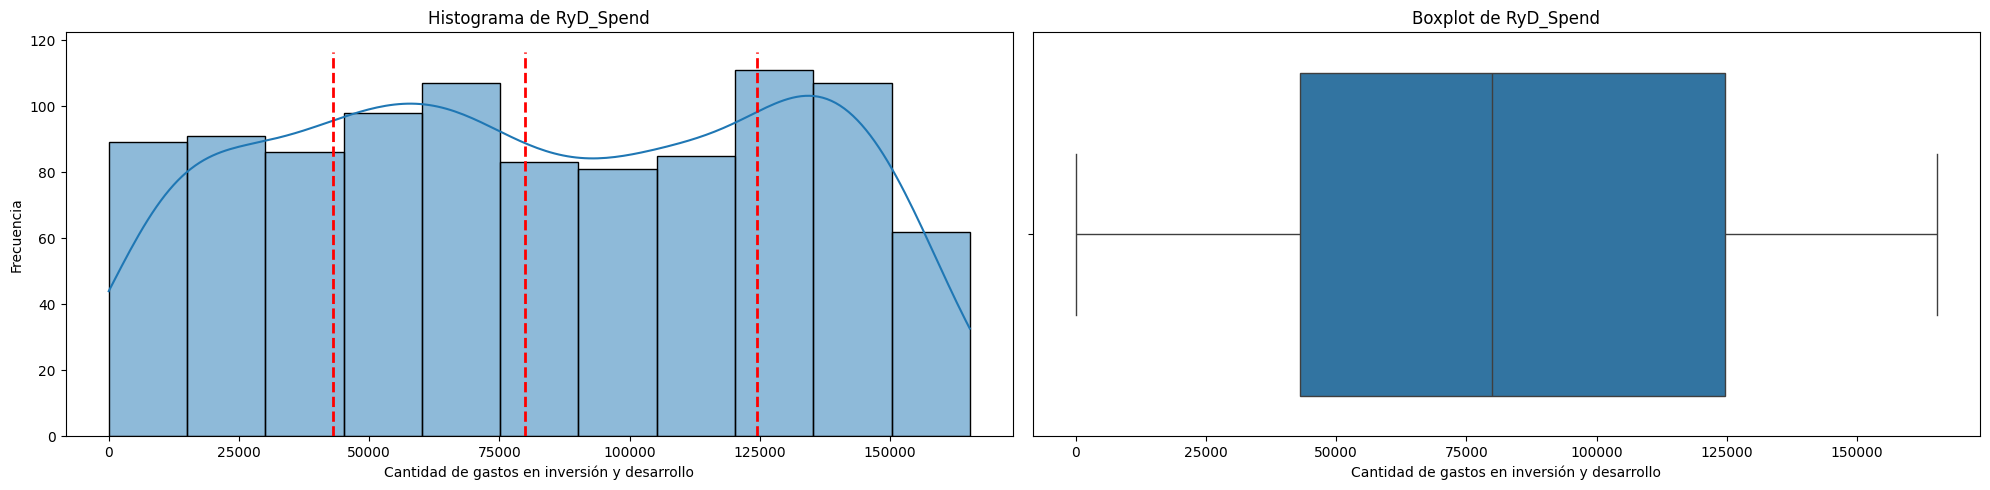

count      1000.000000
mean      81668.927200
std       46537.567891
min           0.000000
25%       43084.500000
50%       79936.000000
75%      124565.500000
max      165349.200000
Name: RyD_Spend, dtype: float64

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['RyD_Spend'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de RyD_Spend')
axs[0].set_xlabel('Cantidad de gastos en inversión y desarrollo')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = companies['RyD_Spend'].quantile(0.25)
q2 = companies['RyD_Spend'].quantile(0.5)
q3 = companies['RyD_Spend'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=companies['RyD_Spend'], ax=axs[1])
axs[1].set_title('Boxplot de RyD_Spend')
axs[1].set_xlabel('Cantidad de gastos en inversión y desarrollo')

plt.tight_layout()
plt.show()

companies['RyD_Spend'].describe()

**Histograma:**

El histograma muestra la distribución de la cantidad de gastos en inversion y desarrollo. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad de gastos en inversion y desarrollo no se concentran alrededor de un rango específico, lo que no indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad de gastos en inversion y desarrollo. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de gastos no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de los gastos en inversión y desarrollo en los datos presenta una tendencia central, con la mayoría de los  gastos en inversión y desarrollo concentrándose alrededor de 79936.0 . La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a los gastos en inversión y desarrollo. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Administration

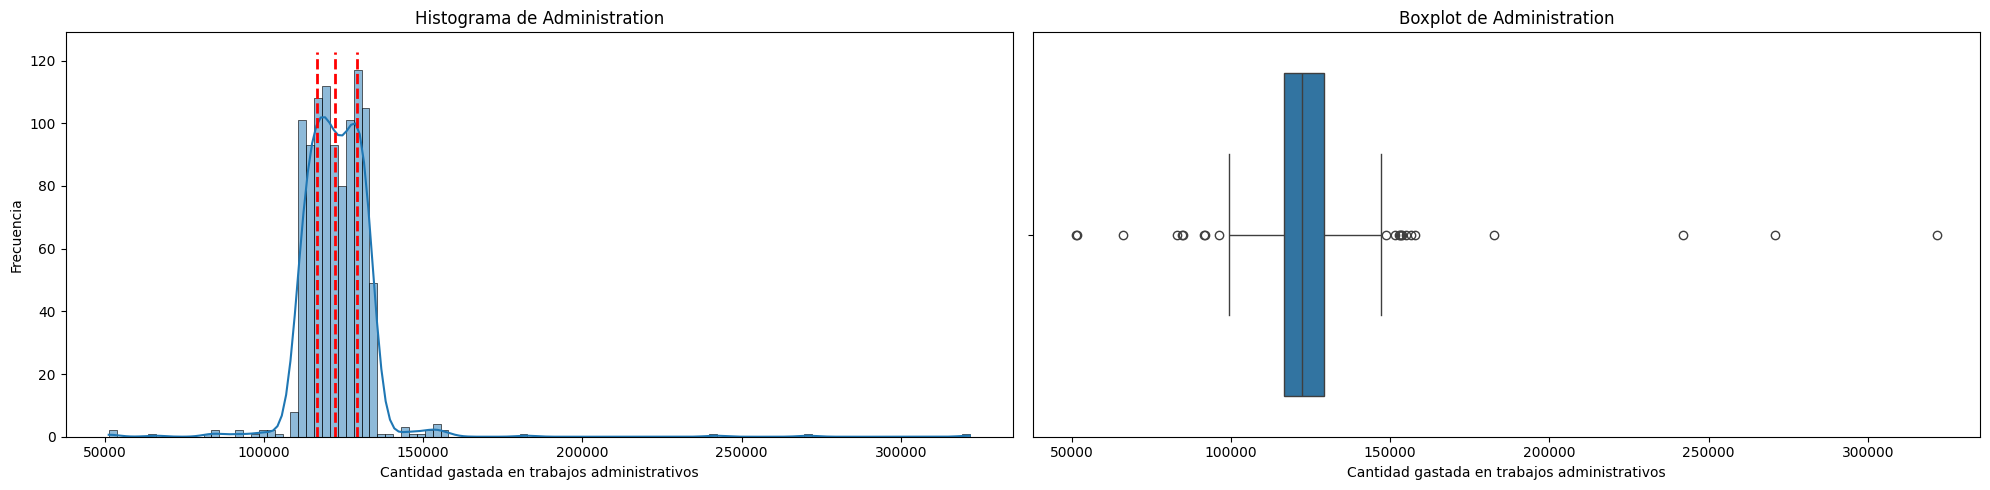

count      1000.000000
mean     122963.897612
std       12613.927535
min       51283.140000
25%      116640.684850
50%      122421.612150
75%      129139.118000
max      321652.140000
Name: Administration, dtype: float64

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['Administration'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Administration')
axs[0].set_xlabel('Cantidad gastada en trabajos administrativos')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = companies['Administration'].quantile(0.25)
q2 = companies['Administration'].quantile(0.5)
q3 = companies['Administration'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=companies['Administration'], ax=axs[1])
axs[1].set_title('Boxplot de Administration')
axs[1].set_xlabel('Cantidad gastada en trabajos administrativos')

plt.tight_layout()
plt.show()

companies['Administration'].describe()


**Histograma:**

El histograma muestra la distribución de la cantidad gastada en trabajos administrativos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad gastada en trabajos administrativos se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad gastada en trabajos administrativos. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de la cantidad gastos en trabajos administrativos significativamente altos.

**Interpretación:**

En general, la distribución de la cantidad gastada en trabajos administrativos en los datos  presenta una tendencia central, con la mayoría de la cantidad gastada en trabajos administrativos concentrándose alrededor de 122421.61. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de la cantidad gastada en trabajos administrativos significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.



#### MarketingSpend

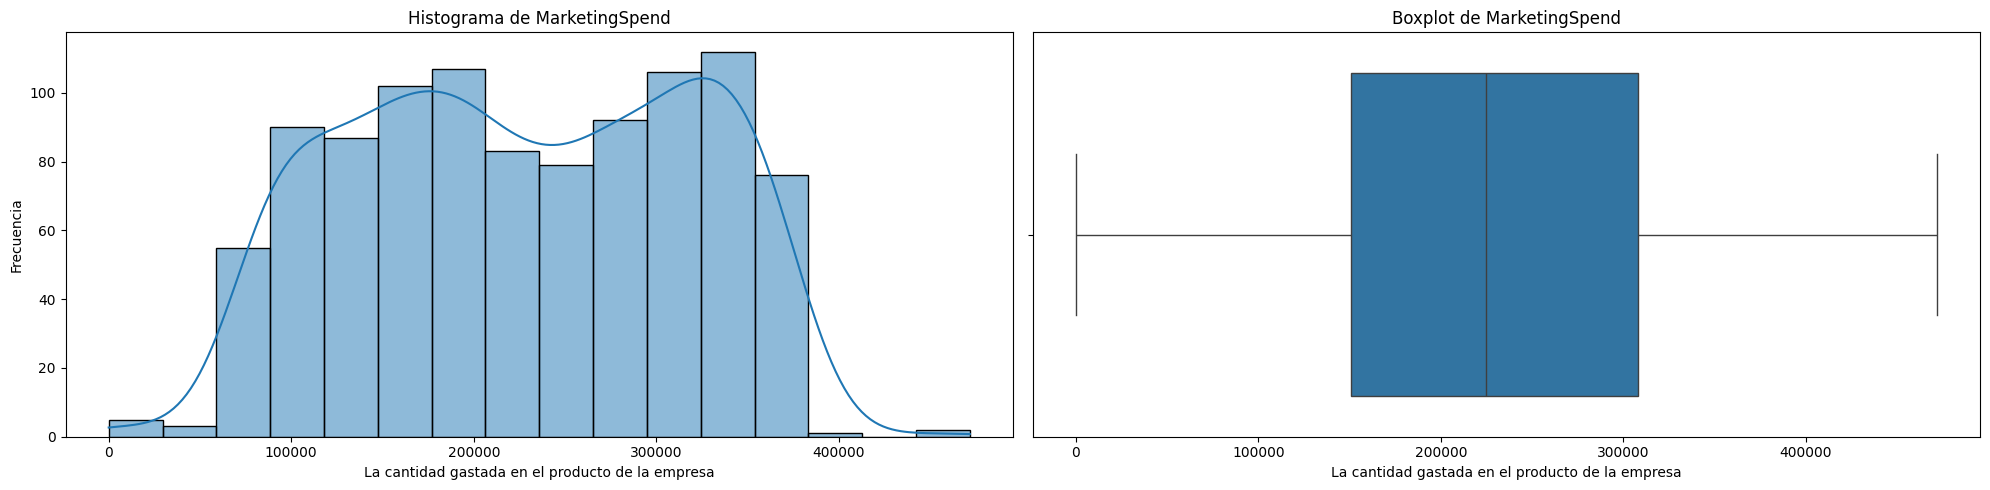

count      1000.000000
mean     226205.058419
std       91578.393542
min           0.000000
25%      150969.584600
50%      224517.887350
75%      308189.808525
max      471784.100000
Name: MarketingSpend, dtype: float64

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['MarketingSpend'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de MarketingSpend')
axs[0].set_xlabel('La cantidad gastada en el producto de la empresa')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=companies['MarketingSpend'], ax=axs[1])
axs[1].set_title('Boxplot de MarketingSpend')
axs[1].set_xlabel('La cantidad gastada en el producto de la empresa')

plt.tight_layout()
plt.show()

companies['MarketingSpend'].describe()


**Histograma:**

El histograma muestra la distribución de la cantidad gastada en el producto de la empresa. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad gastada en el producto de la empresa se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad gastada en el producto de la empresa Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la cantidad gastada en el producto de la empresa no presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la cantidad gastada en el producto de la empresa en los datos presenta una tendencia central, con la mayoría de la cantidad gastada en el producto de la empresa concentrándose alrededor de 224517.89. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la cantidad gastada en el producto de la empresa La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Profit

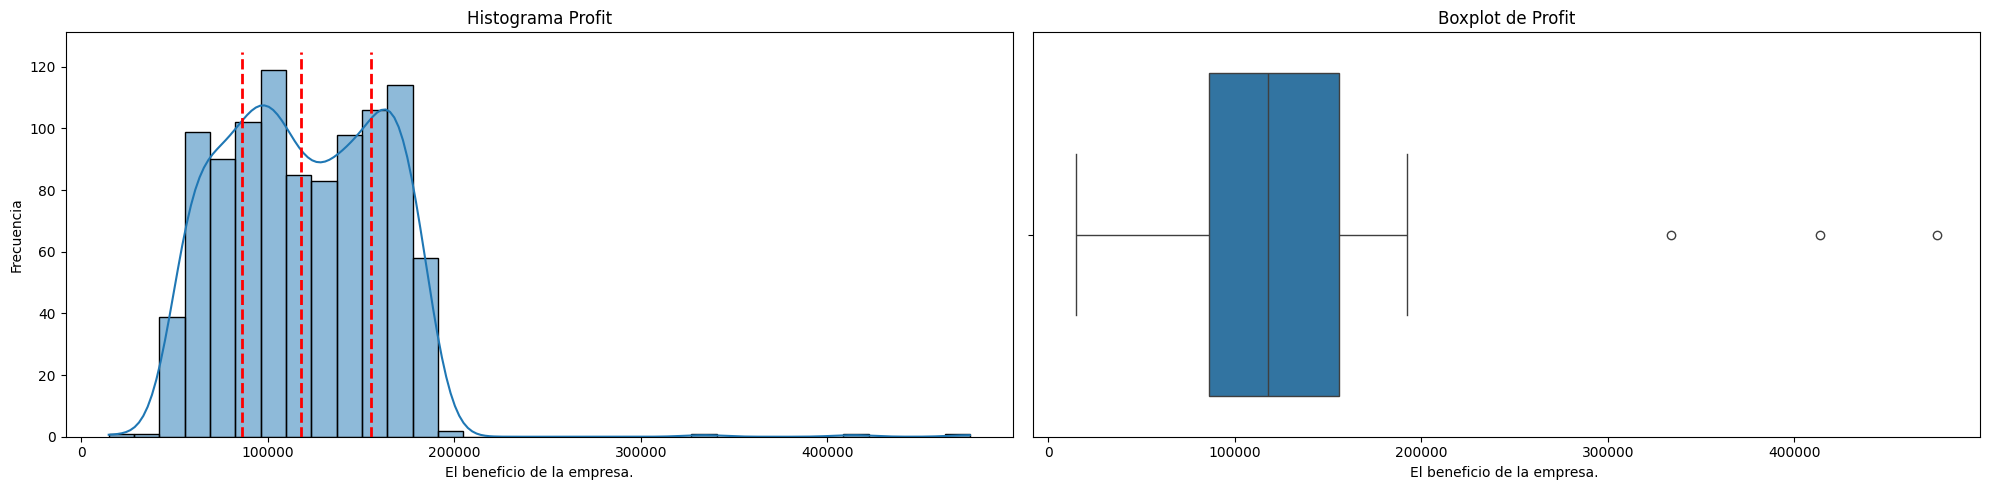

count      1000.000000
mean     119546.164656
std       42888.633848
min       14681.400000
25%       85943.198543
50%      117641.466300
75%      155577.107425
max      476485.430000
Name: Profit, dtype: float64

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['Profit'], kde=True, ax=axs[0])

# Calcular cuartiles
q1 = companies['Profit'].quantile(0.25)
q2 = companies['Profit'].quantile(0.5)
q3 = companies['Profit'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

axs[0].set_title('Histograma Profit')
axs[0].set_xlabel('El beneficio de la empresa.')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=companies['Profit'], ax=axs[1])
axs[1].set_title('Boxplot de Profit')
axs[1].set_xlabel('El beneficio de la empresa. ')

plt.tight_layout()
plt.show()

companies['Profit'].describe()



**Histograma:**

El histograma muestra la distribución de la velocidad de el beneficio de la empresa en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de el beneficio de la empresa se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de el beneficio de la empresa. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de el beneficio de la empresa significativamente altos.

**Interpretación:**

En general, la distribución de el beneficio de la empresa en los datos presenta una tendencia central, con la mayoría de el beneficio de la empresa concentrándose alrededor de 117641.47. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de el beneficio de la empresa significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


### Conclusiones

#### Columnas
- RyD_Spend: La cantidad gastada en investigación y desarrollo.
- Administration: La cantidad gastada en trabajos administrativos.
- MarketingSpend: La cantidad gastada en el producto de la empresa.
- State: Sucursales que tiene la empresa en Nueva York, California y Florida.
- Profit: El beneficio de la empresa.

#### Outliers

Según nuestro análisis previo, las siguientes columnas presentan valores atípicos: **Profit** y **Administration**. A excepción de **Profit** deberán tratarse todos los valores atípicos encontrados para así evitar que estos puedan sesgar o influir en la estimación de los parámetros del modelo, ya que un solo valor atípico podría arrastrar la línea de regresión hacia sí mismo, lo que resulta en una pendiente y una intersección que no representa correctamente la relación general entre las variables.

Para lograr esto deberemos tener en cuenta que los datos eliminados nunca deberán ser superiores al 10% de los datos totales, ya que si no, podríamos perder información valiosa que podría ser crucial para nuestro análisis. Además, una eliminación excesiva de datos podría llevar a un sesgo en los resultados del modelo. Por lo tanto, es esencial equilibrar la necesidad de limpiar los datos y preservar la integridad de nuestro conjunto de datos.

Sin embargo, cabe aclarar que estos valores atípicos podrían ser un error de Tipo I al rechazar incorrectamente la hipótesis nula de que el punto de datos no es un valor atípico. Por lo tanto, evaluaremos su tratamiento dependiendo de los resultados obtenidos.

### Eliminación de duplicados de Companies

In [30]:
# Eliminar filas duplicadas
companies = companies.drop_duplicates()

# Mostrar filas duplicadas
print("Filas duplicadas:")
print(companies)

# Verificar la forma del DataFrame después de eliminar duplicados
print("Número de filas después de eliminar duplicados:", companies.shape[0])

Filas duplicadas:
     RyD_Spend  Administration  MarketingSpend       State        Profit
0    165349.20      136897.800     471784.1000    New York  192261.83000
1    162597.70      151377.590     443898.5300  California  191792.06000
2    153441.51      101145.550     407934.5400     Florida  191050.39000
3    144372.41      118671.850     383199.6200    New York  182901.99000
4    142107.34       91391.770     366168.4200     Florida  166187.94000
..         ...             ...             ...         ...           ...
995   54135.00      118451.999     173232.6695  California   95279.96251
996  134970.00      130390.080     329204.0228  California  164336.60550
997  100275.47      241926.310     227142.8200  California  413956.48000
998  128456.23      321652.140     281692.3200  California  333962.19000
999  161181.72      270939.860     295442.1700    New York  476485.43000

[999 rows x 5 columns]
Número de filas después de eliminar duplicados: 999


### Estandarización

Estandarizamos de Comapies las variables continuas porque:

- Mejora la convergencia de muchos algoritmos de aprendizaje automático.
- Hace que los coeficientes de los modelos sean más interpretables.
- Evita que variables con grandes magnitudes dominen sobre otras.

In [31]:
companies_sub = companies.drop(['State'], axis=1)
companies_est = (companies_sub-companies_sub.mean())/companies_sub.std()
companies_est

RyD_Spend  Administration  MarketingSpend    Profit
0     1.797288        1.104089        2.680351  1.694645
1     1.738193        2.251436        2.376004  1.683698
2     1.541543       -1.728839        1.983487  1.666413
3     1.346763       -0.340094        1.713526  1.476518
4     1.298115       -2.501706        1.527645  1.087005
..         ...             ...             ...       ...
995  -0.591293       -0.357515       -0.578087 -0.565473
996   1.144825        0.588432        1.124209  1.043861
997   0.399680        9.426313        0.010297  6.861139
998   1.004926       15.743610        0.605659  4.996908
999   1.707782       11.725282        0.755727  8.318347

[999 rows x 4 columns]

### One hot enconding


In [32]:
# Codificar las variables categóricas
dummies_state = pd.get_dummies(companies['State'], dtype=int, drop_first=True)
dummies_state = dummies_state.rename(columns={'Florida': 'State_Florida', 'New York': 'State_New_York'})
# df_std = df_std.drop('State', axis=1)
companies_est = pd.concat([companies_est, dummies_state], axis=1)
companies_est

RyD_Spend  Administration  MarketingSpend    Profit  State_Florida  \
0     1.797288        1.104089        2.680351  1.694645              0   
1     1.738193        2.251436        2.376004  1.683698              0   
2     1.541543       -1.728839        1.983487  1.666413              1   
3     1.346763       -0.340094        1.713526  1.476518              0   
4     1.298115       -2.501706        1.527645  1.087005              1   
..         ...             ...             ...       ...            ...   
995  -0.591293       -0.357515       -0.578087 -0.565473              0   
996   1.144825        0.588432        1.124209  1.043861              0   
997   0.399680        9.426313        0.010297  6.861139              0   
998   1.004926       15.743610        0.605659  4.996908              0   
999   1.707782       11.725282        0.755727  8.318347              0   

     State_New_York  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
..              ...  
995               0  
996               0  
997               0  
998               0  
999               1  

[999 rows x 6 columns]

# Actividad 2
Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión)
analizando los parámetros máximo profundidad, número mínimo de observaciones,
número mínimo de observaciones por separación y criterio de separación. Graficar el
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos
conjuntos de test (Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error
Cuadrático Medio).

In [33]:
# Definimos nuestros conjuntos x e y, donde y es nuestra variable a predecir, y x las variables explicativas
x = companies_est.drop(columns=['Profit'])
y = companies_est['Profit']

In [34]:
feature_list = list(x.columns)
feature_list

['RyD_Spend',
 'Administration',
 'MarketingSpend',
 'State_Florida',
 'State_New_York']

### Entrenamiento 80% y Test 20%

In [35]:
# Dividimos los datos en entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4570)

#### Árboles de decisión (Regresión)

In [36]:
clf = tree.DecisionTreeRegressor(random_state=4570)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor = clf.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions = regressor.predict(X_test)

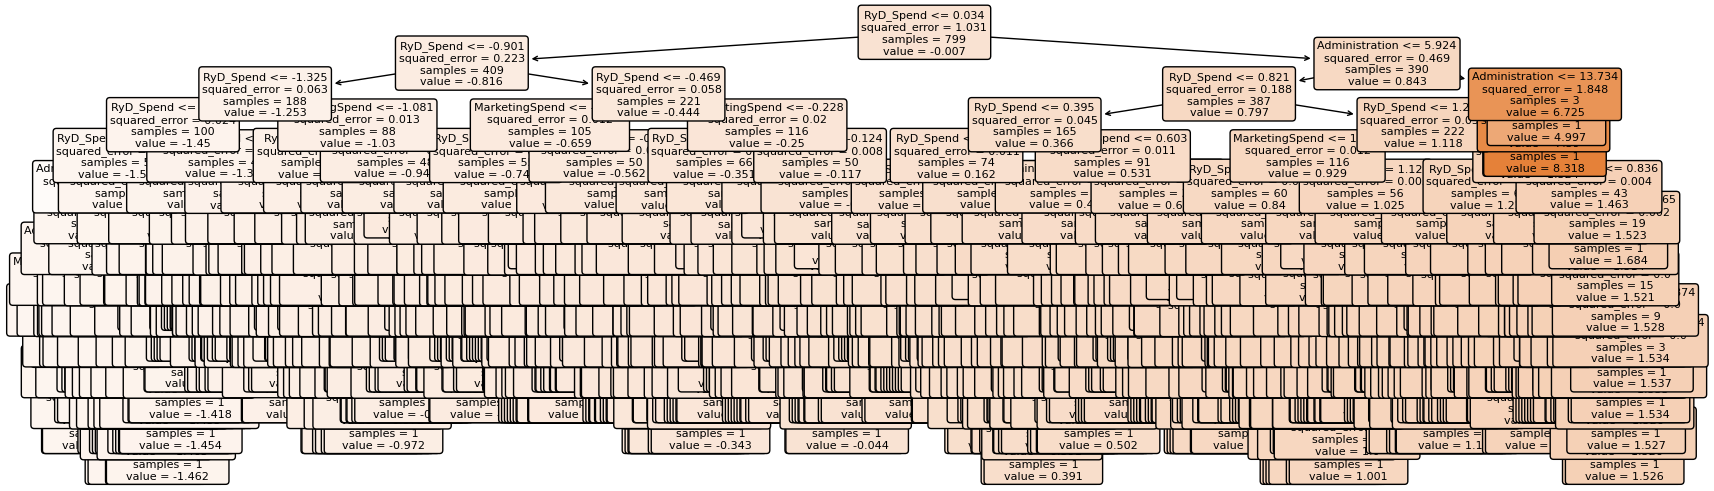

In [37]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

#### Optimización de hiperparámetros

In [38]:
# Definir una cuadrícula de hiperparámetros para buscar las mejores combinaciones
param_grid = {
    'max_depth': [6, 7, 9],
    'min_samples_split':[2,3,5],
    'min_samples_leaf': [1,2,5],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'], #no usamos poisson pq hay valores negativos
    'random_state': [4570]
}
# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Ajustar el objeto GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
# Realizar predicciones utilizando el mejor modelo encontrado
y_pred = best_model.predict(X_test)

Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 4570}


#### Árboles de decisión (Regresión) optimizado

In [39]:
clf_ho = tree.DecisionTreeRegressor(
    criterion = 'squared_error',
    max_depth=9,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=4570)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor_ho = clf_ho.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_ho = regressor_ho.predict(X_test)

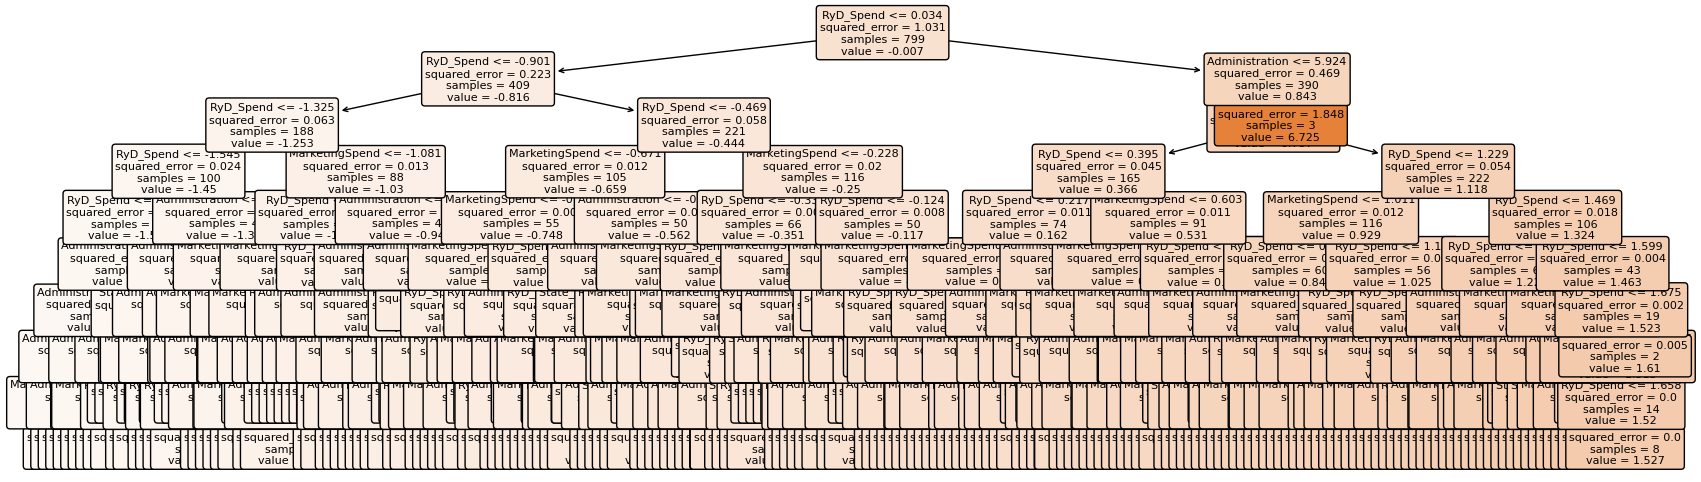

In [40]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor_ho,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Lo podamos en el nivel 3 para mejor interpretación

In [41]:
clf_pod = tree.DecisionTreeRegressor(
    criterion = 'squared_error',
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=4570)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor_pod = clf_pod.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_pod = regressor_pod.predict(X_test)

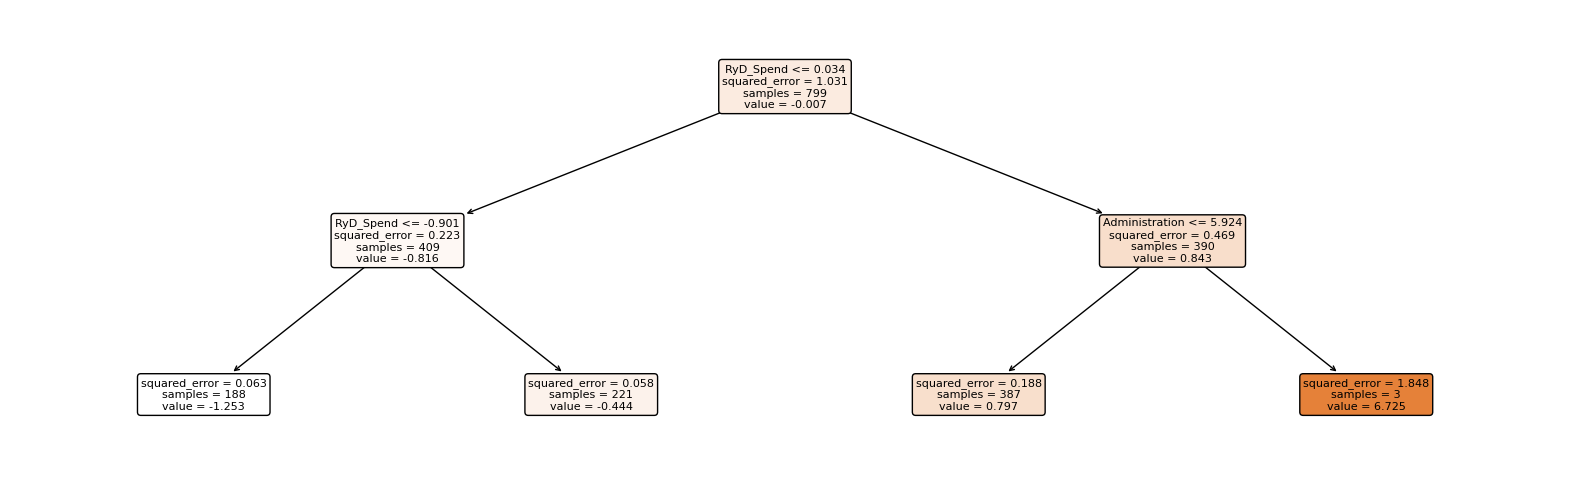

In [42]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor_pod,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

**Interpretacion**:

*Nodo Raíz* (Root Node):  

En este caso, el nodo raíz tiene la condición RyD_Spend <= 0.034. Esto significa que el conjunto de datos se divide en dos ramas dependiendo de si el valor de RyD_Spend es menor o igual a ese valor.

De los 799 valores que había en el nodo raíz, se dividieron y quedaron 409 de un lado y 390 del otro

*Condiciones de División* (Splitting Conditions):  

El segundo nodo a la izquierda del nodo raíz tiene la condición RyD_Spend <= -0.901, lo que significa que los datos en esa rama se dividen de nuevo basándose en si RyD_Spend es menor o igual a -0.901.

El segundo nodo a la derecha del nodo raíz tiene la condición Administration <= 5.926, lo que significa que los datos en esa rama se dividen de nuevo basándose en si Administration es menor o igual a 5.926.


#### Metricas de Companies con hiperparámetros optimizados.


In [43]:
y_test = y_test.astype(float)

mae = mean_absolute_error(y_test, predictions_ho)
mse = mean_squared_error(y_test, predictions_ho)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, predictions_ho) # medida de la bondad de ajuste del modelo

# Calcular R-squared adjusted (R2 ajustado)
n = len(y_test)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores

# Imprimimos las métricas
print("Métricas del árbol sin podar: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)


print("----------------------------------------------------------")

mae_pod = mean_absolute_error(y_test, predictions_pod)
mse_pod = mean_squared_error(y_test, predictions_pod)
rmse_pod = np.sqrt(mse_pod)

r2_pod = r2_score(y_test, predictions_pod) # medida de la bondad de ajuste del modelo

r2_adjusted_pod = 1 - ((1 - r2_pod) * (n - 1) / (n - p - 1))
# Imprimir métricas
print("Metricas del árbol podado: ")
print("Mean Absolute Error (MAE):", mae_pod)
print("Mean Squared Error (MSE):", mse_pod)
print("Root Mean Squared Error (RMSE):", rmse_pod)
print("R-squared (R2):", r2_pod)
print("R-squared adjusted (R2 ajustado):", r2_adjusted_pod)

Métricas del árbol sin podar: 
Mean Absolute Error (MAE): 0.01299833013625045
Mean Squared Error (MSE): 0.0024689029646405977
Root Mean Squared Error (RMSE): 0.04968805655930404
R-squared (R2): 0.9971666531082377
R-squared adjusted (R2 ajustado): 0.9970936287038108
----------------------------------------------------------
Metricas del árbol podado: 
Mean Absolute Error (MAE): 0.29028634947116233
Mean Squared Error (MSE): 0.12520808728720084
Root Mean Squared Error (RMSE): 0.35384754808702695
R-squared (R2): 0.8563094823816464
R-squared adjusted (R2 ajustado): 0.8526061185255033


**Interpretacion**:

Podemos observar que las métricas del árbol vs las del arbol podado cambian muy ligeramente, por lo tanto concluimos que no influye podarlo a la hora de su rendimiento. Ademas los valores de las métricas son todos bajos esto significa que nuestro modelo tiene un buen desempeño y que que las diferencias entre los valores reales y los valores predichos por el modelo son pequeñas.

In [44]:
tableResult = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
tableResult

Actual  Predicted
367  1.114716   1.115433
536 -0.088397  -0.085152
967 -1.051489  -1.050274
841 -0.570470  -0.566707
359  0.201616   0.203228
..        ...        ...
339  0.543571   0.543172
469 -1.015513  -1.014378
358  0.609807   0.613690
538  1.475923   1.480980
713 -0.791737  -0.792693

[200 rows x 2 columns]

### Entrenamiento 70% y Test 30%

In [45]:
# Dividimos los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4570)

#### Árboles de decisión (Regresión)

In [46]:
clf = tree.DecisionTreeRegressor(random_state=4570)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor = clf.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions = regressor.predict(X_test)

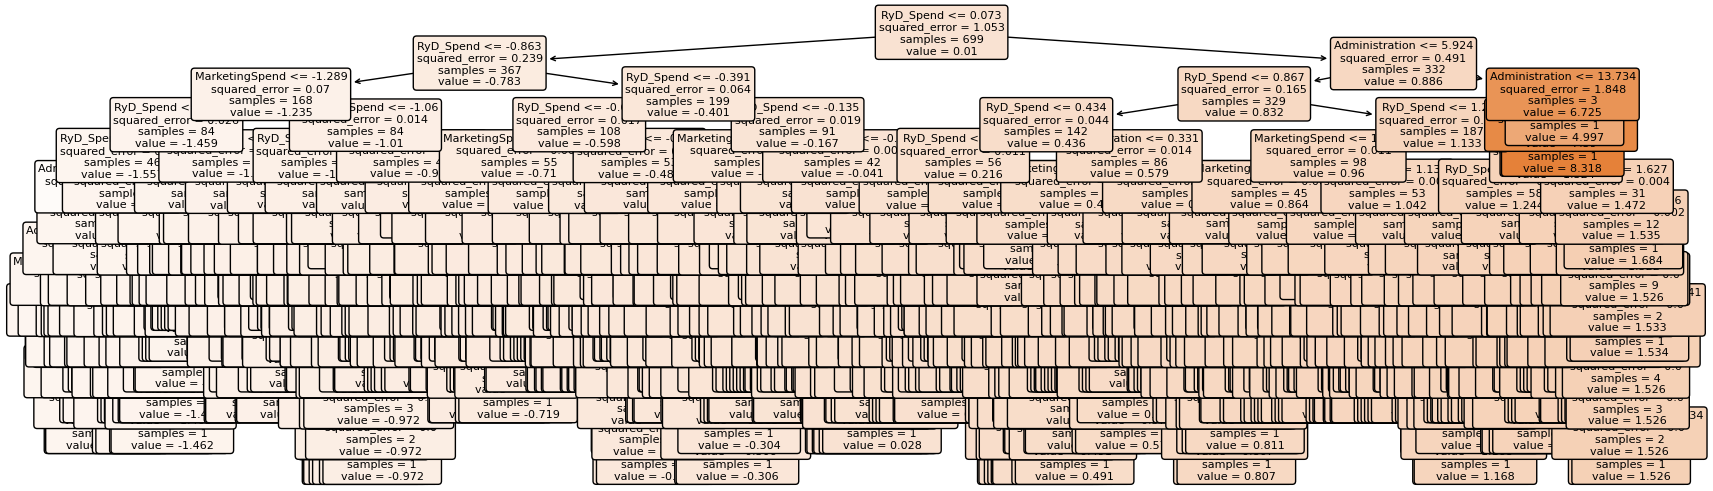

In [47]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

#### Optimización de hiperparámetros

In [48]:
# Definir una cuadrícula de hiperparámetros para buscar las mejores combinaciones
param_grid = {
    'max_depth': [6, 7, 9],
    'min_samples_split':[2,3,5],
    'min_samples_leaf': [1,2,5],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'], #no usamos poisson pq hay valores negativos
    'random_state': [4570]
}
# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Ajustar el objeto GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
# Realizar predicciones utilizando el mejor modelo encontrado
y_pred = best_model.predict(X_test)

Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 4570}


#### Árboles de decisión (Regresión) optimizado

In [97]:
clf_ho = tree.DecisionTreeRegressor(
    criterion = 'squared_error',
    max_depth=9,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=4570)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor_ho = clf_ho.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_ho = regressor_ho.predict(X_test)

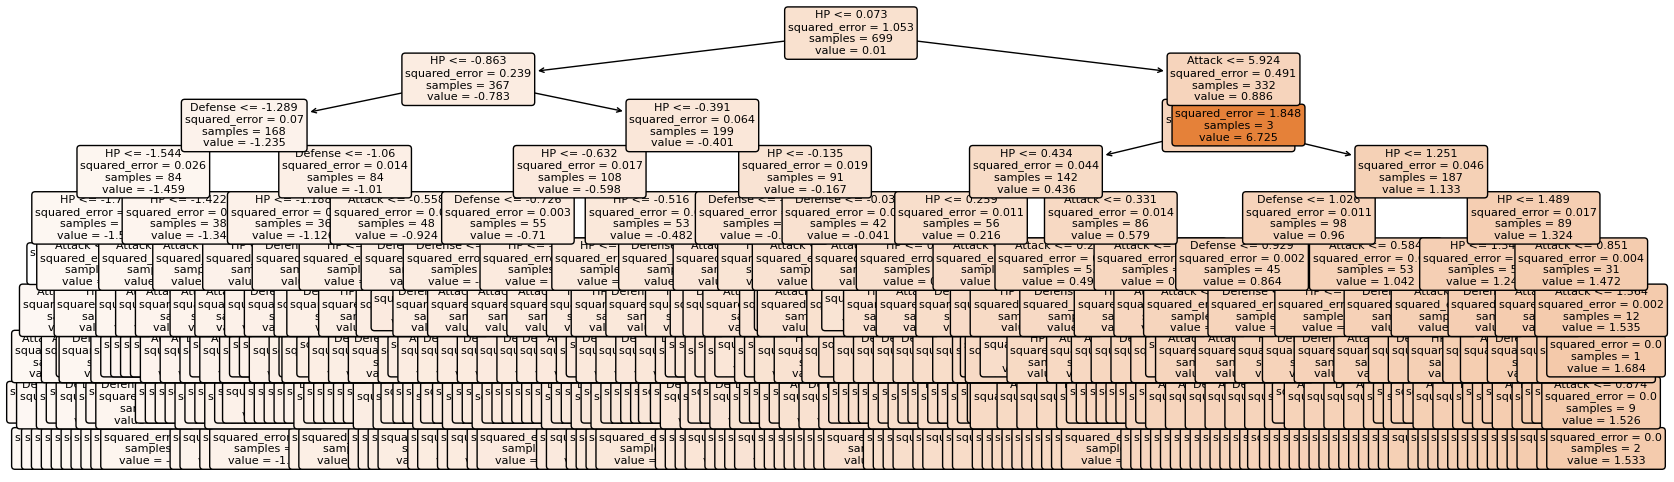

In [98]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor_ho,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Lo podamos en el nivel 3 para mejor interpretación

In [102]:
clf_pod = tree.DecisionTreeRegressor(
    criterion = 'squared_error',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=4570)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor_pod = clf_pod.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_pod = regressor_pod.predict(X_test)

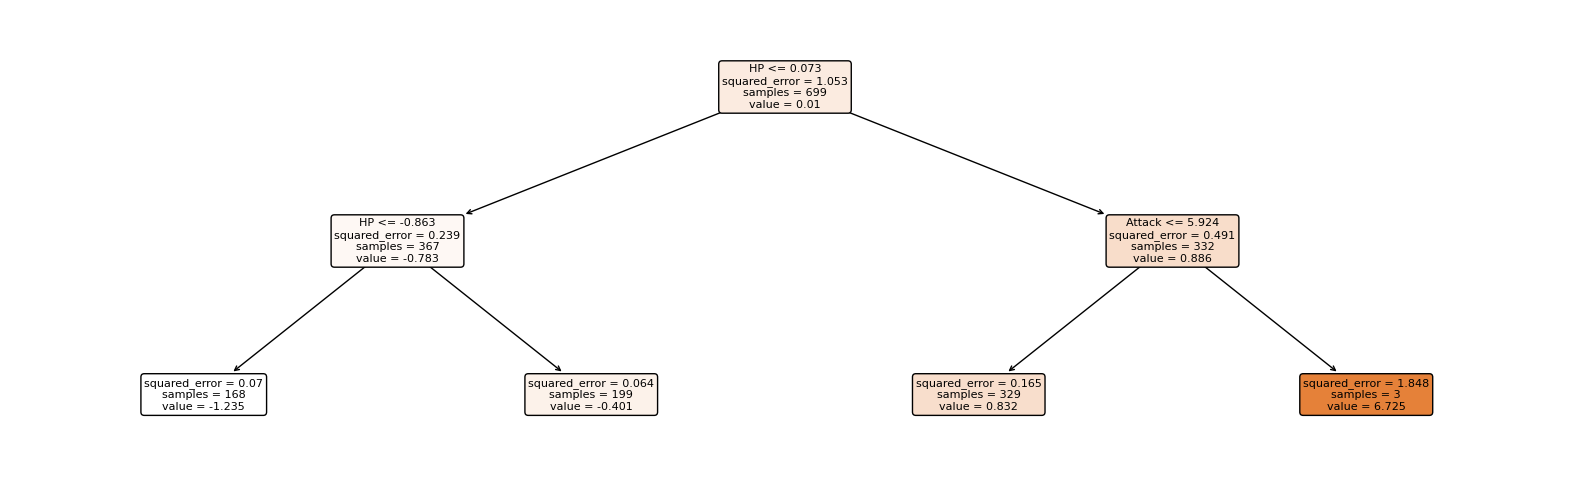

In [103]:
plt.figure(figsize=(20,6))
tree.plot_tree(regressor_pod,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

**Interpretacion**:

*Nodo Raíz* (Root Node):  

En este caso, el nodo raíz tiene la condición RyD_Spend <= 0.073. Esto significa que el conjunto de datos se divide en dos ramas dependiendo de si el valor de RyD_Spend es menor o igual a ese valor.

De los 699 valores que había en el nodo raíz, se dividieron y quedaron 367 de un lado y 886 del otro

*Condiciones de División* (Splitting Conditions):  

El segundo nodo a la izquierda del nodo raíz tiene la condición RyD_Spend <= -0.863, lo que significa que los datos en esa rama se dividen de nuevo basándose en si RyD_Spend es menor o igual a -0.863.

El segundo nodo a la derecha del nodo raíz tiene la condición Administration <= 5.924, lo que significa que los datos en esa rama se dividen de nuevo basándose en si Administration es menor o igual a 5.924.


#### Metricas de Companies con hiperparámetros optimizados.


In [104]:
y_test = y_test.astype(float)

mae = mean_absolute_error(y_test, predictions_ho)
mse = mean_squared_error(y_test, predictions_ho)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, predictions_ho) # medida de la bondad de ajuste del modelo

# Calcular R-squared adjusted (R2 ajustado)
n = len(y_test)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores

# Imprimimos las métricas
print("Métricas del árbol sin podar: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)


print("----------------------------------------------------------")

mae_pod = mean_absolute_error(y_test, predictions_pod)
mse_pod = mean_squared_error(y_test, predictions_pod)
rmse_pod = np.sqrt(mse_pod)

r2_pod = r2_score(y_test, predictions_pod) # medida de la bondad de ajuste del modelo

r2_adjusted_pod = 1 - ((1 - r2_pod) * (n - 1) / (n - p - 1))
# Imprimir métricas
print("Metricas del árbol podado: ")
print("Mean Absolute Error (MAE):", mae_pod)
print("Mean Squared Error (MSE):", mse_pod)
print("Root Mean Squared Error (RMSE):", rmse_pod)
print("R-squared (R2):", r2_pod)
print("R-squared adjusted (R2 ajustado):", r2_adjusted_pod)

Métricas del árbol sin podar: 
Mean Absolute Error (MAE): 0.018468588552010074
Mean Squared Error (MSE): 0.004737299734746173
Root Mean Squared Error (RMSE): 0.06882804468199118
R-squared (R2): 0.9945750581531494
R-squared adjusted (R2 ajustado): 0.9944639671938282
----------------------------------------------------------
Metricas del árbol podado: 
Mean Absolute Error (MAE): 0.28908381309848624
Mean Squared Error (MSE): 0.12524351372593226
Root Mean Squared Error (RMSE): 0.3538976034475682
R-squared (R2): 0.8565767807185577
R-squared adjusted (R2 ajustado): 0.8536397864670606


**Interpretacion**:

Podemos observar que las métricas del árbol vs las del arbol podado cambian muy ligeramente, por lo tanto concluimos que no influye podarlo a la hora de su rendimiento. Ademas los valores de las métricas son todos bajos esto significa que nuestro modelo tiene un buen desempeño y que que las diferencias entre los valores reales y los valores predichos por el modelo son pequeñas.

In [105]:
tableResult = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
tableResult

Actual  Predicted
367  1.114716   1.115433
536 -0.088397  -0.085152
967 -1.051489  -1.050274
841 -0.570470  -0.568539
359  0.201616   0.203228
..        ...        ...
759  0.998727   0.999663
35  -0.537518  -0.690481
444 -1.415980  -1.418071
416  0.218897   0.219832
717 -1.148027  -1.148903

[300 rows x 2 columns]

# Actividad 3
Descargar el conjunto de datos, PokemonDB.csv2, para realizar el trabajo práctico.
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de
datos, etc.)

### Carga de datos

In [55]:
'''
Contexto:
Este conjunto de datos contiene información sobre los 802 Pokemon de las Siete Generaciones de Pokemon. La información contenida en
este conjunto de datos incluye estadísticas básicas, rendimiento contra otros tipos, altura, peso, clasificación, pasos de huevo,
puntos de experiencia, habilidades, etc.


Contenido:
Name: El nombre en inglés del Pokemon
Type: El tipo del Pokemon
HP: El HP Base del Pokemon
Attack: El Ataque Base del Pokemon
Defense: La Defensa Base del Pokemon
Sp. Atk: El Ataque Especial Base del Pokemon
Sp. Def: La Defensa Especial Base del Pokemon
Speed: La Velocidad Base del Pokemon
'''


file_path= 'PokemonDB.csv'
PokemonDB = pd.read_csv(file_path, sep=',',engine='python')

#Contenido obtenido de:www.kaggle.com/datasets/rounakbanik/pokemon

### Visualización de datos

Examinaremos los datos para un primer vistazo.

In [56]:
PokemonDB

Name      Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Bulbasaur     Grass   45      49       49       65       65     45
1          Ivysaur     Grass   60      62       63       80       80     60
2         Venusaur     Grass   80      82       83      100      100     80
3         Venusaur     Grass   80     100      123      122      120     80
4       Charmander      Fire   39      52       43       60       50     65
...            ...       ...  ...     ...      ...      ...      ...    ...
1185        Chi-Yu      Dark   55      80       80      135      120    100
1186  Roaring Moon    Dragon  105     139       71       55      101    119
1187  Iron Valiant     Fairy   74     130       90      120       60    116
1188      Koraidon  Fighting  100     135      115       85      100    135
1189      Miraidon  Electric  100      85      100      135      115    135

[1190 rows x 8 columns]

A continuación, examinaremos qué tipos de variables son las columnas.

In [57]:
PokemonDB.dtypes

Name       object
Type       object
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object

Vemos si hay valores duplicados

In [58]:
PokemonDB[PokemonDB.duplicated(keep=False)]

Name      Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
95         Geodude      Rock   40      80      100       30       30     20
96         Geodude      Rock   40      80      100       30       30     20
97        Graveler      Rock   55      95      115       45       45     35
98        Graveler      Rock   55      95      115       45       45     35
99           Golem      Rock   80     120      130       55       65     45
100          Golem      Rock   80     120      130       55       65     45
118         Grimer    Poison   80      80       50       40       50     25
119         Grimer    Poison   80      80       50       40       50     25
120            Muk    Poison  105     105       75       65      100     50
121            Muk    Poison  105     105       75       65      100     50
133        Voltorb  Electric   40      30       50       55       55    100
134        Voltorb  Electric   40      30       50       55       55    100
135      Electrode  Electric   60      50       70       80       80    150
136      Electrode  Electric   60      50       70       80       80    150
147        Weezing    Poison   65      90      120       85       70     60
148        Weezing    Poison   65      90      120       85       70     60
170         Tauros  Fighting   75     110      105       30       70    100
171         Tauros  Fighting   75     110      105       30       70    100
172         Tauros  Fighting   75     110      105       30       70    100
506          Burmy       Bug   40      29       45       29       45     36
507          Burmy       Bug   40      29       45       29       45     36
508          Burmy       Bug   40      29       45       29       45     36
583          Rotom  Electric   50      65      107      105      107     86
584          Rotom  Electric   50      65      107      105      107     86
585          Rotom  Electric   50      65      107      105      107     86
586          Rotom  Electric   50      65      107      105      107     86
587          Rotom  Electric   50      65      107      105      107     86
665       Basculin     Water   70      92       65       80       55     98
666       Basculin     Water   70      92       65       80       55     98
667       Basculin     Water   70      92       65       80       55     98
778         Keldeo     Water   91      72       90      129       90    108
779         Keldeo     Water   91      72       90      129       90    108
812       Meowstic   Psychic   74      48       76       83       81    104
813       Meowstic   Psychic   74      48       76       83       81    104
897       Rockruff      Rock   45      65       40       30       40     60
898       Rockruff      Rock   45      65       40       30       40     60
1010    Toxtricity  Electric   75      98       70      114       70     75
1011    Toxtricity  Electric   75      98       70      114       70     75
1041       Morpeko  Electric   58      95       58       70       58     97
1042       Morpeko  Electric   58      95       58       70       58     97
1060       Urshifu  Fighting  100     130      100       63       60     97
1061       Urshifu  Fighting  100     130      100       63       60     97
1099      Maushold    Normal   74      75       70       65       75    111
1100      Maushold    Normal   74      75       70       65       75    111
1106  Squawkabilly    Normal   82      96       51       45       51     92
1107  Squawkabilly    Normal   82      96       51       45       51     92
1108  Squawkabilly    Normal   82      96       51       45       51     92
1109  Squawkabilly    Normal   82      96       51       45       51     92
1161   Dudunsparce    Normal  125     100       80       85       75     55
1162   Dudunsparce    Normal  125     100       80       85       75     55

Vemos que hay valores duplicados, estos los eliminaremos posteriormente.

Para concluir nuestra primera inspección, veremos las estadísticas descriptivas del conjunto de datos.

In [59]:
PokemonDB.describe(include='all')

Name   Type           HP       Attack      Defense      Sp. Atk  \
count    1190   1190  1190.000000  1190.000000  1190.000000  1190.000000   
unique   1008     18          NaN          NaN          NaN          NaN   
top     Rotom  Water          NaN          NaN          NaN          NaN   
freq        6    149          NaN          NaN          NaN          NaN   
mean      NaN    NaN    70.852941    80.957983    74.586555    72.756303   
std       NaN    NaN    26.886443    32.119650    30.718212    32.658636   
min       NaN    NaN     1.000000     5.000000     5.000000    10.000000   
25%       NaN    NaN    51.250000    56.000000    51.000000    50.000000   
50%       NaN    NaN    70.000000    80.000000    70.000000    65.000000   
75%       NaN    NaN    85.000000   100.000000    90.000000    95.000000   
max       NaN    NaN   255.000000   190.000000   250.000000   194.000000   

            Sp. Def        Speed  
count   1190.000000  1190.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      72.050420    69.695798  
std       27.637522    30.204376  
min       20.000000     5.000000  
25%       50.000000    45.000000  
50%       70.000000    67.000000  
75%       90.000000    90.000000  
max      250.000000   200.000000

### Gráficos

#### Type

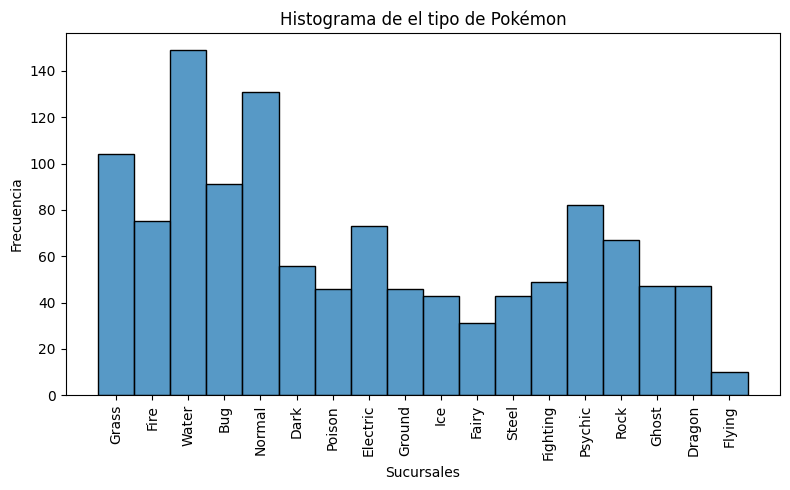

count      1190
unique       18
top       Water
freq        149
Name: Type, dtype: object

In [60]:
fig, axs = plt.subplots(figsize=(8, 5))

# Histograma
sns.histplot(PokemonDB['Type'])
axs.set_title('Histograma de el tipo de Pokémon')
axs.set_xlabel('Sucursales')
axs.set_ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

PokemonDB['Type'].describe()


**Histograma:**

El histograma muestra la distribución de los el tipo de Pokémon. Cada barra en el histograma representa la frecuencia de el tipo de Pokémon específica dentro del conjunto de datos.

**Interpretación:**

Se observa que la frecuencia varía entre los diferentes el tipo de Pokémon, lo que indica que algunos tipos de Pokémon tienen más observaciones que otras en el conjunto de datos.

#### HP

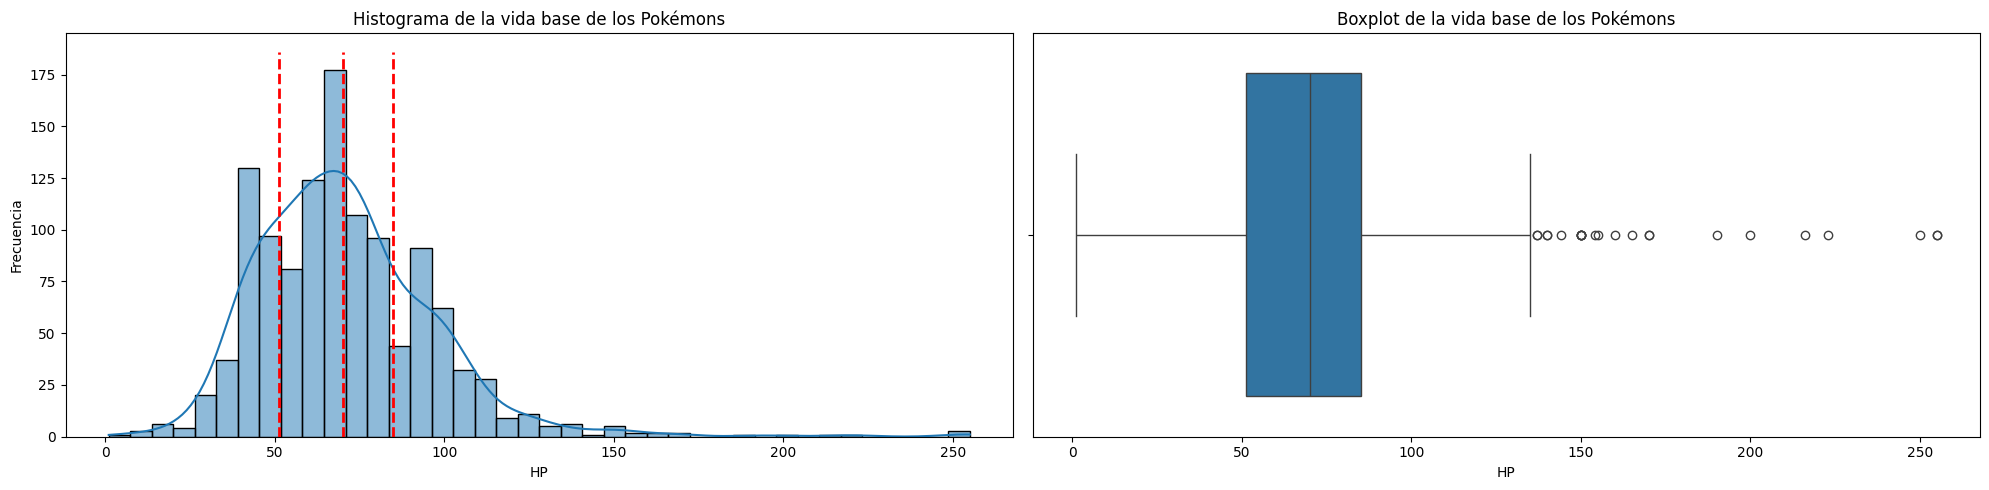

count    1190.000000
mean       70.852941
std        26.886443
min         1.000000
25%        51.250000
50%        70.000000
75%        85.000000
max       255.000000
Name: HP, dtype: float64

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['HP'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la vida base de los Pokémons')
axs[0].set_xlabel('HP')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['HP'].quantile(0.25)
q2 = PokemonDB['HP'].quantile(0.5)
q3 = PokemonDB['HP'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['HP'], ax=axs[1])
axs[1].set_title('Boxplot de la vida base de los Pokémons')
axs[1].set_xlabel('HP')

plt.tight_layout()
plt.show()

PokemonDB['HP'].describe()

**Histograma:**

El histograma muestra la distribución de la vida base de los Pokémons. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la vida base de los Pokémons se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la vida base de los Pokémons. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos que valores de la vida base de los Pokémons significativamente altos.


**Interpretación:**

En general, la distribución de la vida base de los Pokémons presenta una tendencia central, con la mayoría de las vidas base de los Pokémons concentrándose alrededor de 70. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles de vida base significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


#### Attack

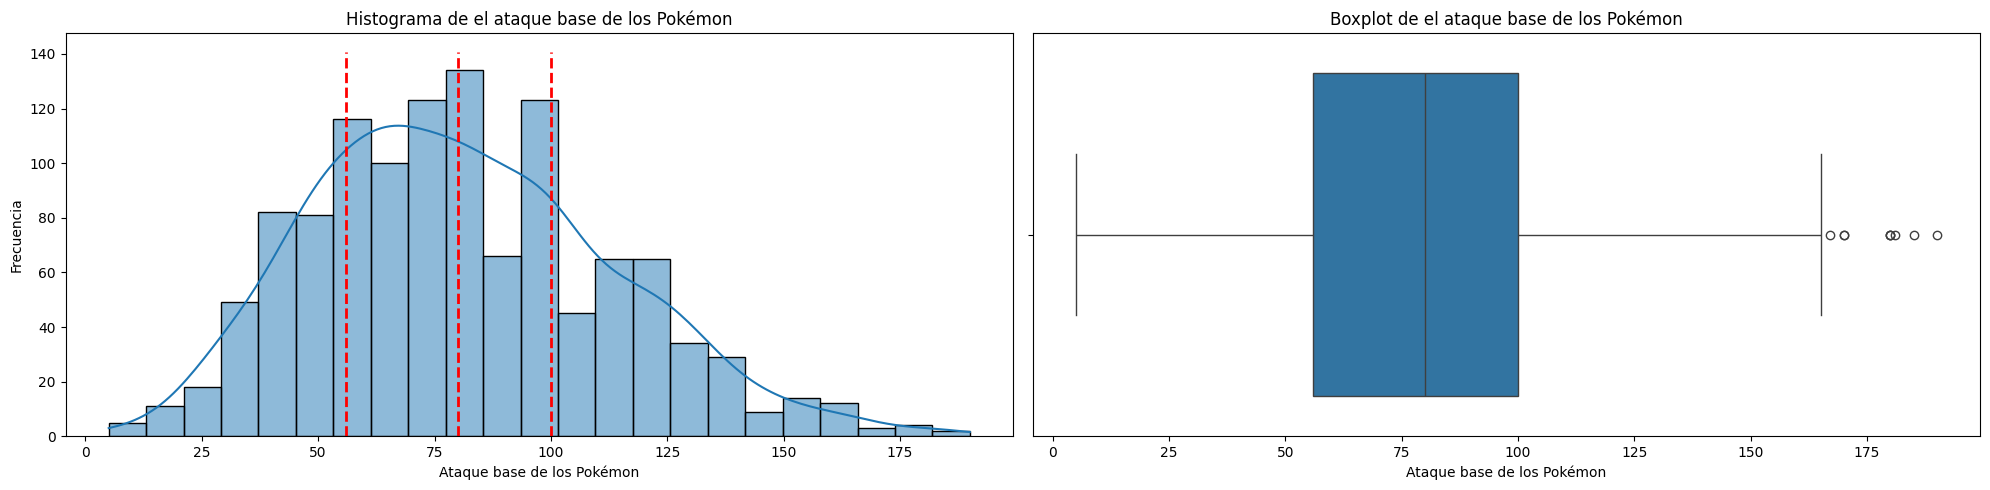

count    1190.000000
mean       80.957983
std        32.119650
min         5.000000
25%        56.000000
50%        80.000000
75%       100.000000
max       190.000000
Name: Attack, dtype: float64

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Attack'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de el ataque base de los Pokémon')
axs[0].set_xlabel('Ataque base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Attack'].quantile(0.25)
q2 = PokemonDB['Attack'].quantile(0.5)
q3 = PokemonDB['Attack'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Attack'], ax=axs[1])
axs[1].set_title('Boxplot de el ataque base de los Pokémon')
axs[1].set_xlabel('Ataque base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Attack'].describe()

**Histograma:**

El histograma muestra la distribución de el ataque base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de el ataque base de los Pokémon se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de el ataque base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que hay algunos valores de el ataque base de los Pokémon significativamente altos.

**Interpretación:**

En general, la distribución de el ataque base de los Pokémon presenta una tendencia central, con la mayoría de el ataque base de los Pokémon concentrándose alrededor de 80. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles de ataque base significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.



#### Defense

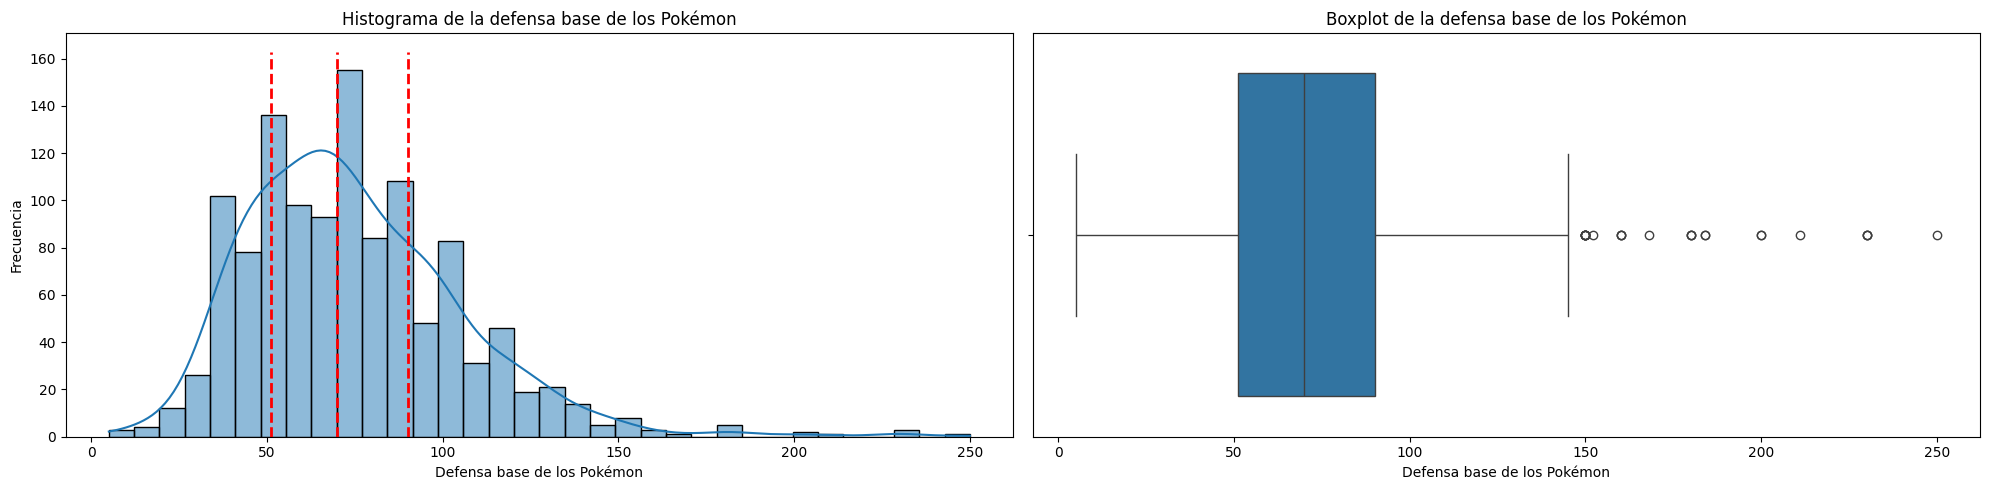

count    1190.000000
mean       74.586555
std        30.718212
min         5.000000
25%        51.000000
50%        70.000000
75%        90.000000
max       250.000000
Name: Defense, dtype: float64

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Defense'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la defensa base de los Pokémon')
axs[0].set_xlabel('Defensa base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Defense'].quantile(0.25)
q2 = PokemonDB['Defense'].quantile(0.5)
q3 = PokemonDB['Defense'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Defense'], ax=axs[1])
axs[1].set_title('Boxplot de la defensa base de los Pokémon')
axs[1].set_xlabel('Defensa base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Defense'].describe()

**Histograma:**

El histograma muestra la distribución de la defensa base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la defensa base de los Pokémon se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la defensa base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la defensa base de los Pokémon presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la defensa base de los Pokémon presenta una tendencia central, con la mayoría de las defensas bases de los Pokémones concentrándose alrededor de 70. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles de el defensa base significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Sp. Def

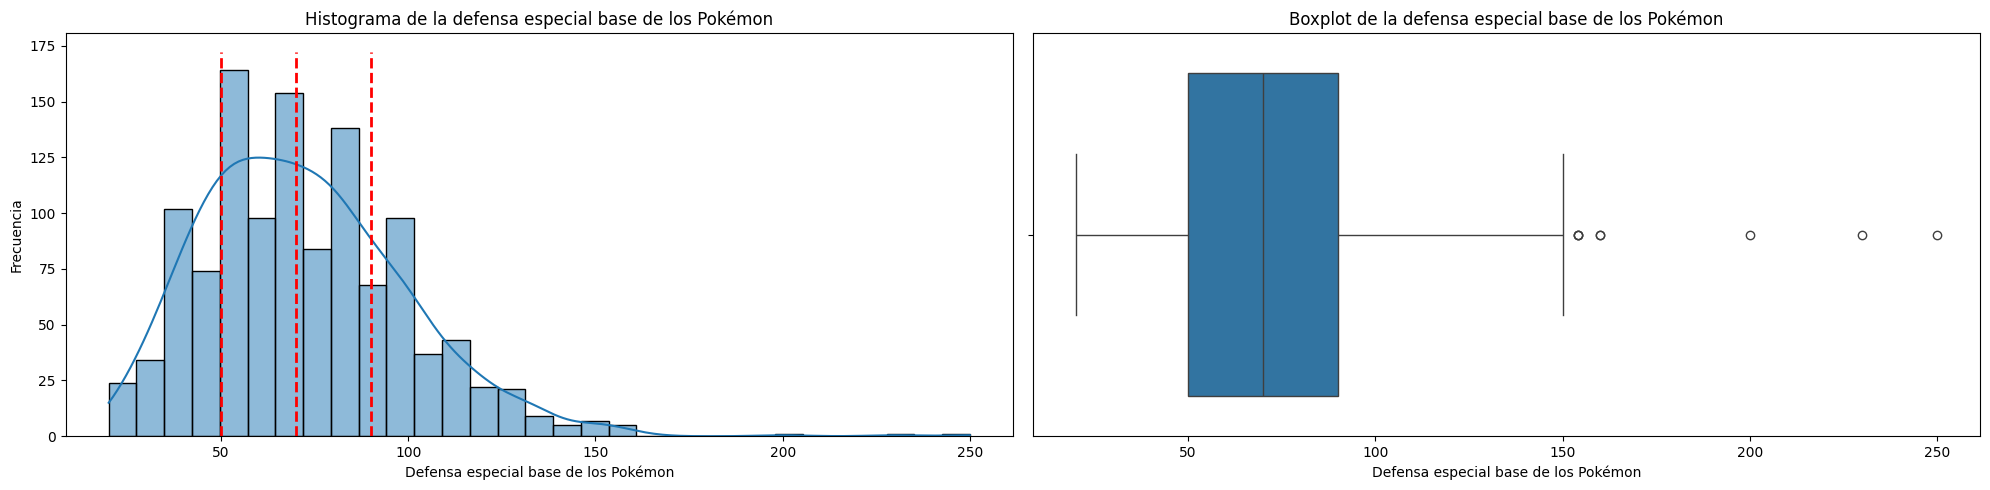

count    1190.000000
mean       72.050420
std        27.637522
min        20.000000
25%        50.000000
50%        70.000000
75%        90.000000
max       250.000000
Name: Sp. Def, dtype: float64

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Sp. Def'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la defensa especial base de los Pokémon')
axs[0].set_xlabel('Defensa especial base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Sp. Def'].quantile(0.25)
q2 = PokemonDB['Sp. Def'].quantile(0.5)
q3 = PokemonDB['Sp. Def'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Sp. Def'], ax=axs[1])
axs[1].set_title('Boxplot de la defensa especial base de los Pokémon')
axs[1].set_xlabel('Defensa especial base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Sp. Def'].describe()

**Histograma:**

El histograma muestra la distribución de la defensa especial base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la defensa especial base de los Pokémon se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de la defensa especial base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la defensa especial base de los Pokémon presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la defensa especial base de los Pokémon presenta una tendencia central, con la mayoría de la defensa especial base de los Pokémon concentrándose alrededor de 70. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles defensa especial significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Speed

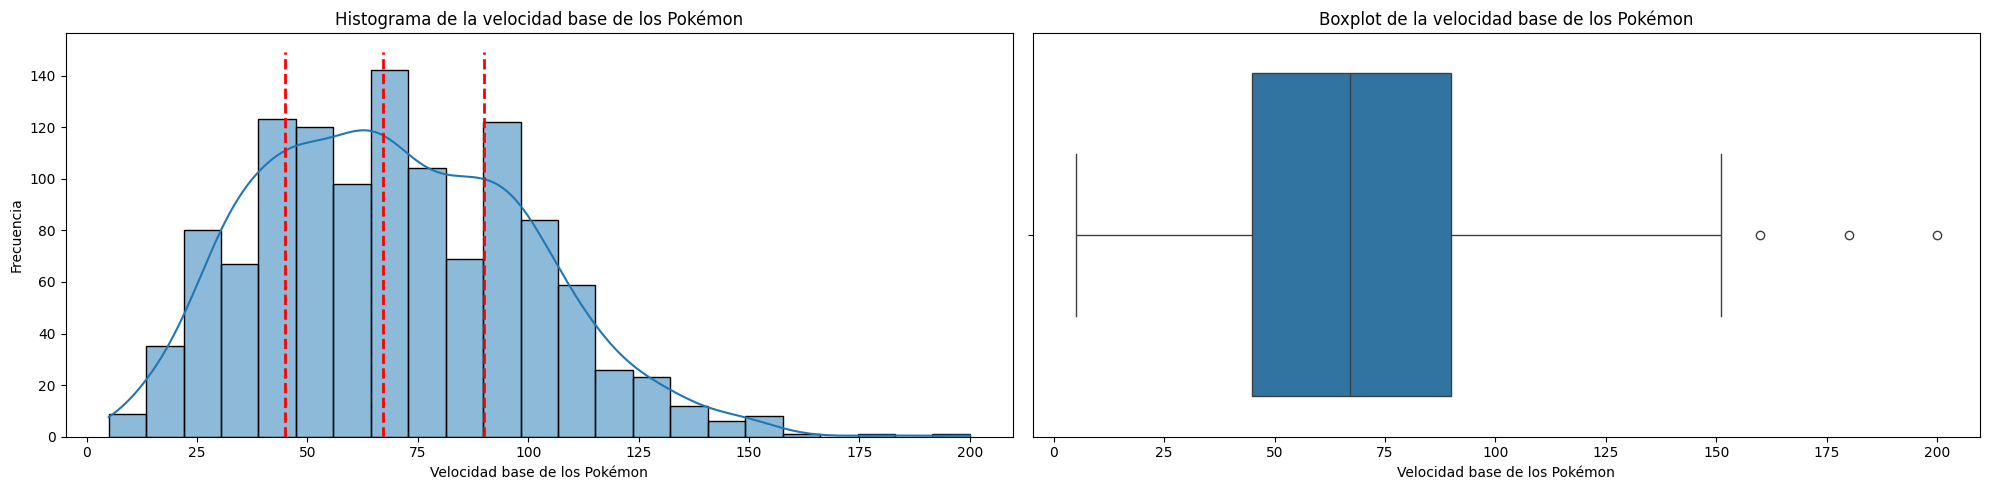

count    1190.000000
mean       69.695798
std        30.204376
min         5.000000
25%        45.000000
50%        67.000000
75%        90.000000
max       200.000000
Name: Speed, dtype: float64

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Speed'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la velocidad base de los Pokémon')
axs[0].set_xlabel('Velocidad base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Speed'].quantile(0.25)
q2 = PokemonDB['Speed'].quantile(0.5)
q3 = PokemonDB['Speed'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Speed'], ax=axs[1])
axs[1].set_title('Boxplot de la velocidad base de los Pokémon')
axs[1].set_xlabel('Velocidad base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Speed'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad gastada de la velocidad base de los Pokémon se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de la velocidad base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la velocidad base de los Pokémon presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la velocidad base de los Pokémon en los datos presenta una tendencia central, con la mayoría de la velocidad base de los Pokémon concentrándose alrededor de 67. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles velocidad significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Sp. Atk

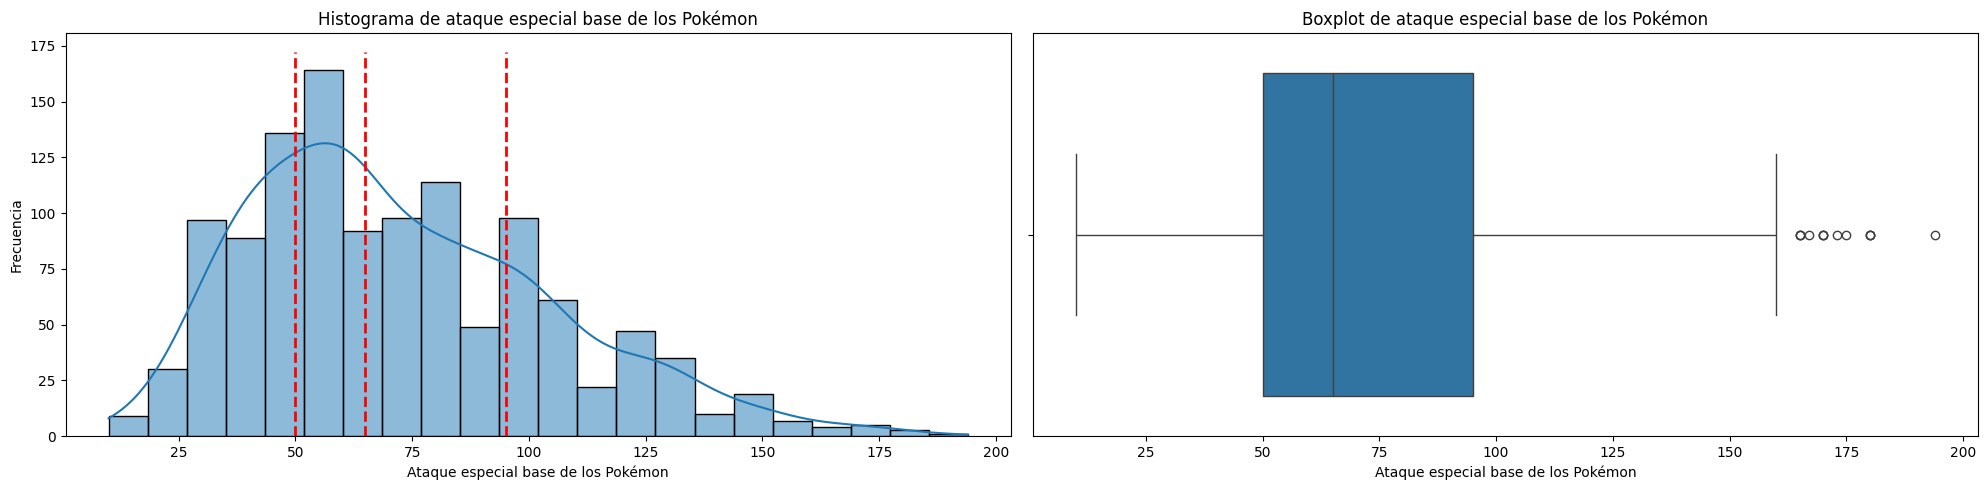

count    1190.000000
mean       72.756303
std        32.658636
min        10.000000
25%        50.000000
50%        65.000000
75%        95.000000
max       194.000000
Name: Sp. Atk, dtype: float64

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Sp. Atk'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de ataque especial base de los Pokémon')
axs[0].set_xlabel('Ataque especial base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Sp. Atk'].quantile(0.25)
q2 = PokemonDB['Sp. Atk'].quantile(0.5)
q3 = PokemonDB['Sp. Atk'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Sp. Atk'], ax=axs[1])
axs[1].set_title('Boxplot de ataque especial base de los Pokémon')
axs[1].set_xlabel('Ataque especial base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Sp. Atk'].describe()

**Histograma:**

El histograma muestra la distribución de ataque especial base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de ataque especial base de los Pokémon se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de ataque especial base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos Pokémon con niveles de ataque especial base significativamente altos.

**Interpretación:**

En general, la distribución de ataque especial base de los Pokémon presenta una tendencia central, con la mayoría de ataque especial base de los Pokémon concentrándose alrededor de 65. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles ataque especial significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


### Conclusiones

#### Columnas
- *Name*: El nombre en inglés del Pokémon
- *Type*: El tipo de Pokémon
- *HP*: El HP base del Pokémon
- *Attack*: El ataque especial base de los Pokémon
- *Defense*: La Defensa Base de los Pokémon
- *Sp. Attack*: El Ataque Base de los Pokémon
- *Sp. Defense*: La defensa especial base de los Pokémon
- *Speed*: La velocidad base del Pokémon


#### Outliers

Según nuestro análisis previo, las siguientes columnas presentan valores atípicos: HP, Attack, Defense, Sp. Attack, Sp. Defense y Speed. Deberán tratarse todos los valores atípicos encontrados para así evitar que estos puedan sesgar o influir en la estimación de los parámetros del modelo, ya que un solo valor atípico podría arrastrar la línea de regresión hacia sí mismo, lo que resulta en una pendiente y una intersección que no representa correctamente la relación general entre las variables.

Para lograr esto deberemos tener en cuenta que los datos eliminados nunca deberán ser superiores al 10% de los datos totales, ya que si no,podríamos perder información valiosa que podría ser crucial para nuestro análisis. Además, una eliminación excesiva de datos podría llevar a un sesgo en los resultados del modelo. Por lo tanto, es esencial equilibrar la necesidad de limpiar los datos y preservar la integridad de nuestro conjunto de datos.

Sin embargo, cabe aclarar que estos valores atípicos podrían ser un error de Tipo I al rechazar incorrectamente la hipótesis nula de que el punto de datos no es un valor atípico. Por lo tanto, evaluaremos su tratamiento dependiendo de los resultados obtenidos.

### Reducción de dimensionalidad

In [67]:
PokemonDB = PokemonDB.drop('Name', axis=1)

PokemonDB

Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Grass   45      49       49       65       65     45
1        Grass   60      62       63       80       80     60
2        Grass   80      82       83      100      100     80
3        Grass   80     100      123      122      120     80
4         Fire   39      52       43       60       50     65
...        ...  ...     ...      ...      ...      ...    ...
1185      Dark   55      80       80      135      120    100
1186    Dragon  105     139       71       55      101    119
1187     Fairy   74     130       90      120       60    116
1188  Fighting  100     135      115       85      100    135
1189  Electric  100      85      100      135      115    135

[1190 rows x 7 columns]

### Eliminación de duplicados de PokemonDB

In [68]:
# Para obtener las filas duplicadas
duplicated_rows = PokemonDB[PokemonDB.duplicated(keep=False)]

print(duplicated_rows)

        Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
4       Fire   39      52       43       60       50     65
5       Fire   58      64       58       80       65     80
6       Fire   78      84       78      109       85    100
95      Rock   40      80      100       30       30     20
96      Rock   40      80      100       30       30     20
...      ...  ...     ...      ...      ...      ...    ...
1107  Normal   82      96       51       45       51     92
1108  Normal   82      96       51       45       51     92
1109  Normal   82      96       51       45       51     92
1161  Normal  125     100       80       85       75     55
1162  Normal  125     100       80       85       75     55

[61 rows x 7 columns]


In [69]:
# Eliminar filas duplicadas
pokemon = PokemonDB.drop_duplicates()

# Mostrar filas duplicadas
print("Filas duplicadas:")
print(pokemon)

# Verificar la forma del DataFrame después de eliminar duplicados
print("Número de filas antes de eliminar duplicados:", PokemonDB.shape[0])
print("Número de filas después de eliminar duplicados:", pokemon.shape[0])

Filas duplicadas:
          Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Grass   45      49       49       65       65     45
1        Grass   60      62       63       80       80     60
2        Grass   80      82       83      100      100     80
3        Grass   80     100      123      122      120     80
4         Fire   39      52       43       60       50     65
...        ...  ...     ...      ...      ...      ...    ...
1185      Dark   55      80       80      135      120    100
1186    Dragon  105     139       71       55      101    119
1187     Fairy   74     130       90      120       60    116
1188  Fighting  100     135      115       85      100    135
1189  Electric  100      85      100      135      115    135

[1155 rows x 7 columns]
Número de filas antes de eliminar duplicados: 1190
Número de filas después de eliminar duplicados: 1155


In [70]:
pokemon

Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Grass   45      49       49       65       65     45
1        Grass   60      62       63       80       80     60
2        Grass   80      82       83      100      100     80
3        Grass   80     100      123      122      120     80
4         Fire   39      52       43       60       50     65
...        ...  ...     ...      ...      ...      ...    ...
1185      Dark   55      80       80      135      120    100
1186    Dragon  105     139       71       55      101    119
1187     Fairy   74     130       90      120       60    116
1188  Fighting  100     135      115       85      100    135
1189  Electric  100      85      100      135      115    135

[1155 rows x 7 columns]

### Estandarización

Los valores de Pokémon ya se encuentran en el mismo rango por eso mismo no estandarizamos.

# Actividad 4
Realizar la estimación del atributo Type utilizando árboles de decisión (Clasificación)
analizando los parámetros máximo profundidad, número mínimo de observaciones,
número mínimo de observaciones por separación y criterio de separación. Graficar el
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos
conjuntos de test (Precisión, Exhaustividad y Exactitud).

In [71]:
#verificamos si quedaron todas las categorías en la división de test
etiquetas = PokemonDB['Type'].unique()
etiquetas

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [72]:
feature_list = list(PokemonDB.drop('Type', axis=1).columns)
feature_list

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

### Entrenamiento 80% y Test 20%

In [73]:
# Dividimos los datos en entrenamiento (80%) y test (20%)
train, test = train_test_split(PokemonDB, test_size=0.2, random_state=4570)

X_train_pokemon = np.array(train.drop('Type', axis = 1))
X_test_pokemon = np.array(test.drop('Type', axis = 1))
y_train_pokemon = np.array(train['Type'])
y_test_pokemon = np.array(test['Type'])

#### Árboles de decisión (Clasificación)

In [74]:
clf_cl = tree.DecisionTreeClassifier(random_state = 4570)

#Entreno el modelo pasando las características de entrenamiento (X_train) y las etiquetas de entrenamiento correspondientes (y_train).
decision_tree = clf_cl.fit(X_train_pokemon, y_train_pokemon)

# Predicción en el conjunto de entrenamiento
predictions_train = decision_tree.predict(X_train_pokemon)

# Predicción en el conjunto de prueba
predictions_test = decision_tree.predict(X_test_pokemon)

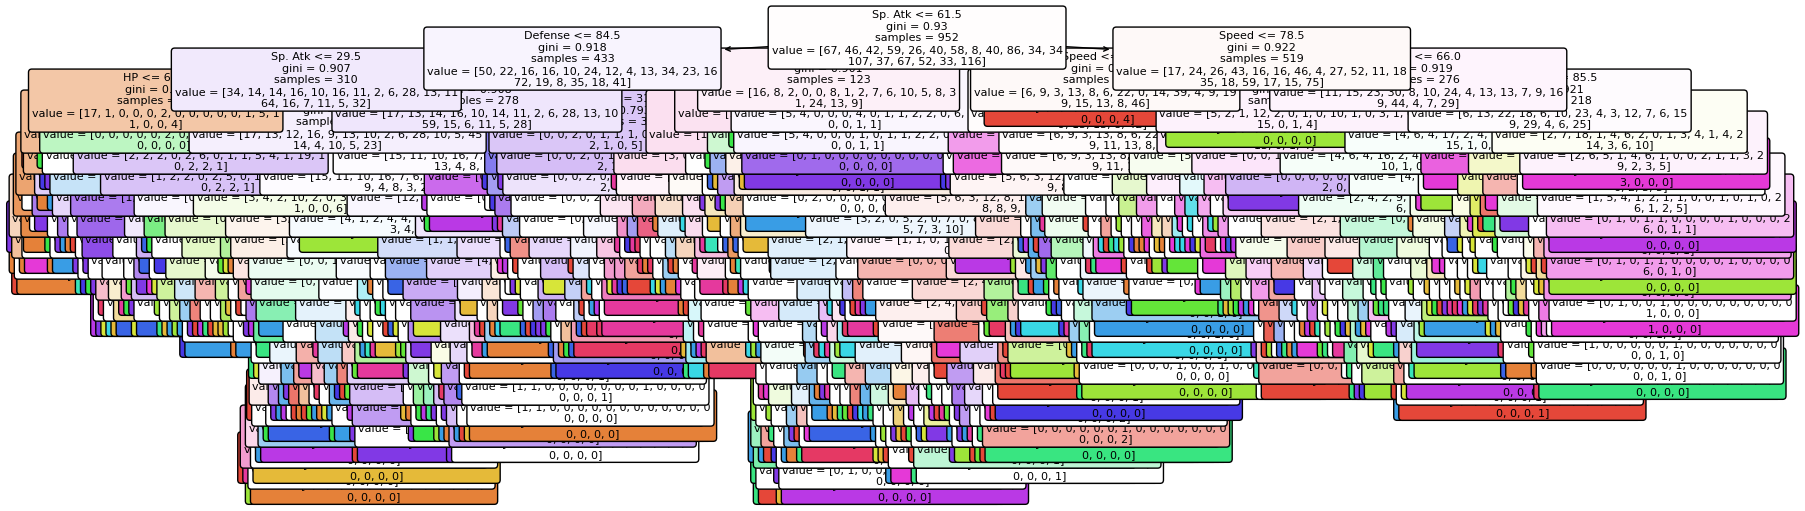

In [75]:
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

#### Evaluamos el accuracy en el conjunto de entrenamieto y en de test

In [76]:
#Evaluo el rendimiento del modelo
train_accuracy = accuracy_score(y_train_pokemon, predictions_train)
test_accuracy = accuracy_score(y_test_pokemon, predictions_test)
print('Accuracy en train: ', train_accuracy)
print('Accuracy en test: ', test_accuracy)

Accuracy en train:  0.9747899159663865
Accuracy en test:  0.1722689075630252


Claramente hay overfitting porque el accuracy del train es mucho mas grande que el de test, para corregir un poco eso aplicamos la optimización de hiperparámetros

#### Optimizacion de hiperparámetros

In [77]:
# max_depth: La profundidad máxima del árbol.
# min_samples_split: El número mínimo de muestras necesarias para dividir un nodo interno.
# min_samples_leaf: Número mínimo de observaciones en un nodo hoja (por separación)
# criterion: Criterio de separación ('gini' o 'entropy')
# random_state: Semilla para la generación de números aleatorios.

param_grid = {
    'max_depth': [6,7, 9, 10],
    'min_samples_split':[2,4],
    'min_samples_leaf': [2,5,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [4570]
}
#usamos grid search pq en este caso tarda muy poco y nos aseguramos de llegar al optimo global
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
grid_search.fit(X_train_pokemon, y_train_pokemon)
first_best_params = grid_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria

best_prediction = grid_search.predict(X_test_pokemon) #Entrenamos el modelo con estos hiperparametros

test_accuracy = accuracy_score(y_test_pokemon, best_prediction)

print(f'{first_best_params} \n {test_accuracy}')

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 4570} 
 0.17647058823529413


#### Árboles de decisión (Clasificación) optimizado


In [78]:
clf_ho = tree.DecisionTreeClassifier(
    criterion='gini',         # Criterio de separación ('gini' o 'entropy')
    max_depth=10,             # Profundidad máxima del árbol
    min_samples_leaf=2,       # Número mínimo de observaciones en un nodo hoja
    min_samples_split=2,      # Número mínimo de observaciones para dividir un nodo
    random_state = 4570      # Semilla para la generación de números aleatorios
)

#Entreno el modelo pasando las características de entrenamiento (X_train_pokemon) y las etiquetas de entrenamiento correspondientes (y_train_pokemon).
decision_tree_ho = clf_ho.fit(X_train_pokemon, y_train_pokemon)

# Predicción en el conjunto de entrenamiento
predictions_train_ho = decision_tree_ho.predict(X_train_pokemon)

# Predicción en el conjunto de prueba
predictions_test_ho = decision_tree_ho.predict(X_test_pokemon)

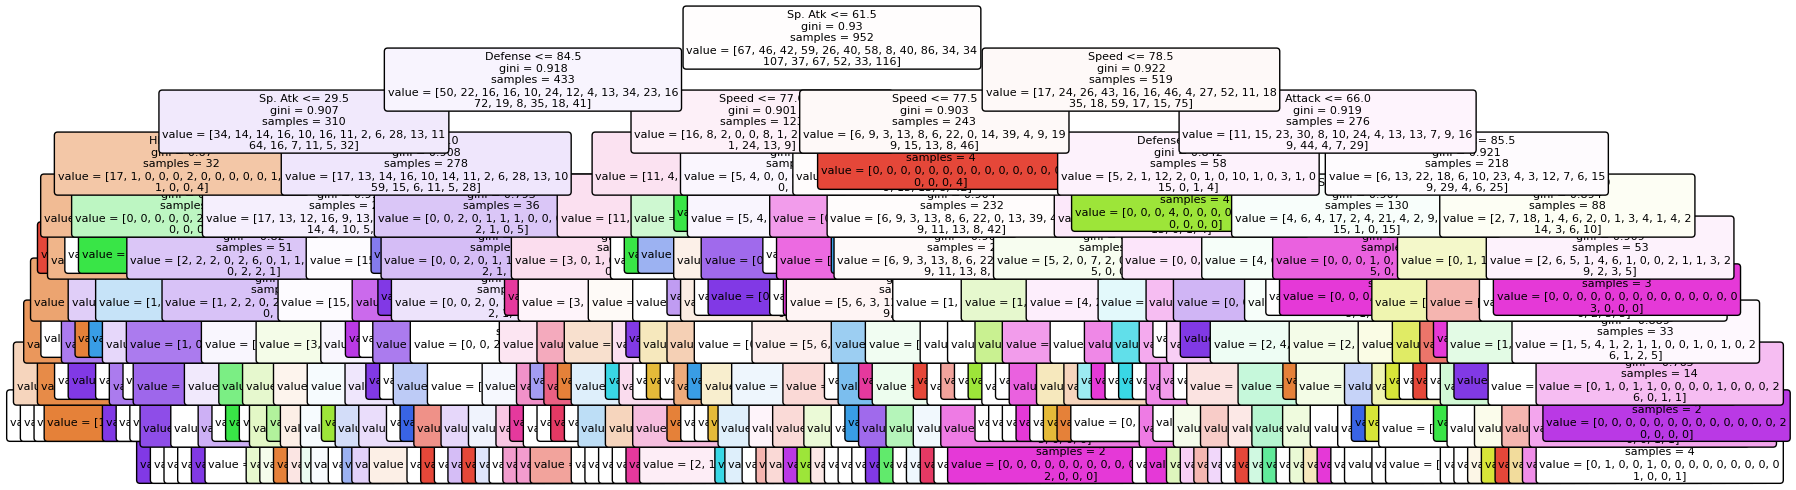

In [79]:
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree_ho,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Lo podamos en el nivel 4 para mejor interpretación

In [80]:
clf_pod = tree.DecisionTreeClassifier(
    criterion='gini',         # Criterio de separación ('gini' o 'entropy')
    max_depth=3,             # Profundidad máxima del árbol
    min_samples_leaf=2,       # Número mínimo de observaciones en un nodo hoja
    min_samples_split=2,      # Número mínimo de observaciones para dividir un nodo
    random_state = 4570      # Semilla para la generación de números aleatorios
)

decision_tree_pod = clf_pod.fit(X_train_pokemon, y_train_pokemon)

predictions_pod = decision_tree_pod.predict(X_test_pokemon)

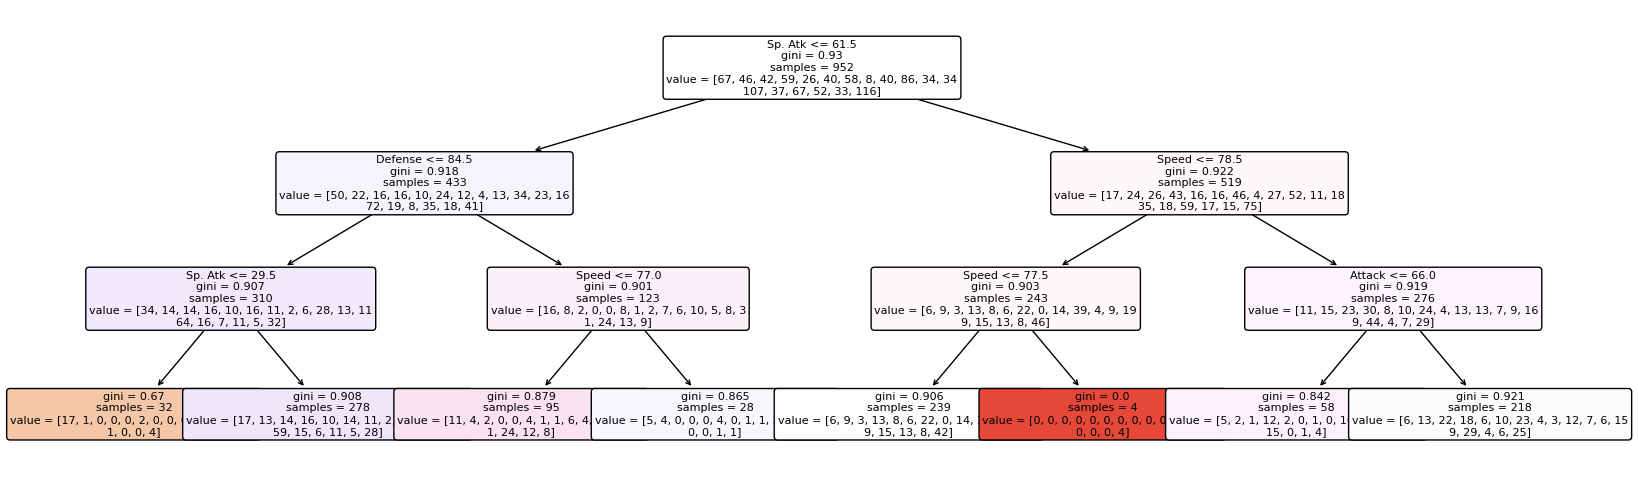

In [81]:
# Graficar el árbol podado
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree_pod,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

- **Gini**: Medida de impureza. La puntuación de Gini da una idea de lo buena que es una división midiendo lo mezcladas que están las clases en los dos grupos creados por la división. Por ejemplo en una de las 8 ultimas hojas, es decir, en uno de los ultimos 8 clusters tiene un gini = 0 lo qeu significa que es puro, por que solo tiene 4 valores de la misma categoria.
- **Sample**: El número de observaciones en el nodo.
- **Value**: La distribución de clases de las muestras en el nodo.


#### Observamos la importancia de cada atributo de Pokemon DB

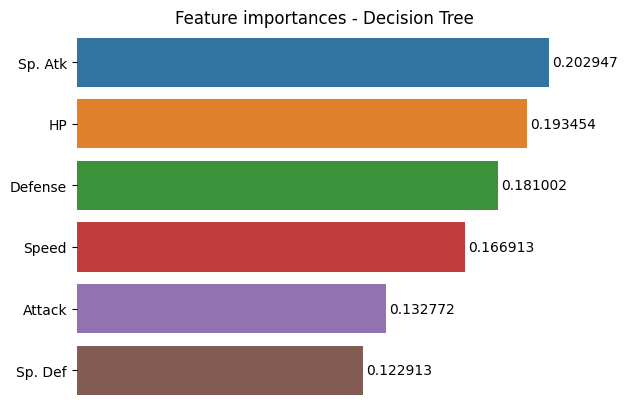

In [82]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': decision_tree_ho.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', hue ='features', legend=False)
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

vemos que la variable Sp. Atk es un poco mas importante que las otras, sin embargo Sp. Atk, Defense y Speed estan muy igualadas

#### Métricas de PokemonDB

In [83]:
accuracy = accuracy_score(y_test_pokemon, predictions_test_ho)
precision = precision_score(y_test_pokemon, predictions_test_ho, average='weighted', zero_division=0)
recall = recall_score(y_test_pokemon, predictions_test_ho, average='weighted')

print(f'Accuracy: {accuracy}')
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.17647058823529413
Precision: 0.17452690311365718
Recall: 0.17647058823529413


**Exactitud (Accuracy)**
La exactitud es la proporción de predicciones correctas sobre el total de predicciones realizadas. En este caso, la exactitud del modelo es de aproximadamente 17.6%. Esto significa que el modelo predice correctamente el tipo de Pokémon en solo el 17.6% de los casos. Una exactitud baja sugiere que el modelo tiene dificultades para clasificar correctamente la mayoría de las instancias.

**Precisión (Precision)**
La precisión es la proporción de verdaderos positivos sobre el total de positivos predichos. En otras palabras, mide la exactitud de las predicciones positivas. Con una precisión de aproximadamente 17.5%, el modelo tiene un alto número de falsos positivos en comparación con los verdaderos positivos. Esto indica que cuando el modelo predice una cierta clase de tipo de Pokémon, solo en el 17.5% de los casos esa predicción es correcta.

**Exhaustividad (Recall)**
La exhaustividad es la proporción de verdaderos positivos sobre el total de positivos reales. En este modelo, la exhaustividad es de aproximadamente 17.6%, lo que significa que el modelo identifica correctamente el 17.6% de las instancias de la clase real. Una baja exhaustividad sugiere que el modelo no es efectivo para identificar todas las instancias positivas, lo que puede ser crítico dependiendo del caso de uso.

#### Matriz de confusión

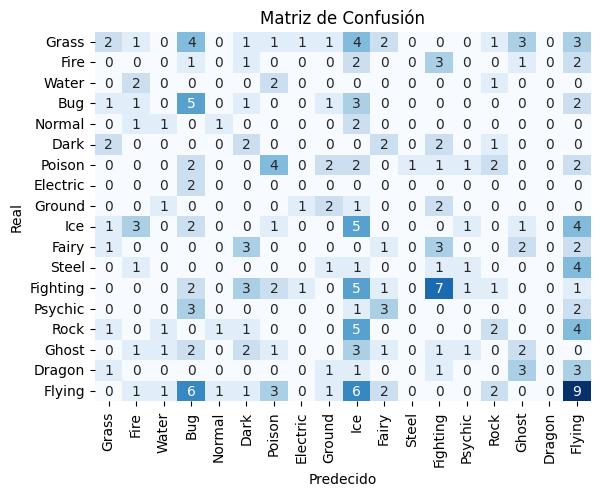

In [84]:
# Calculamos la matriz de confusión
con_mat = confusion_matrix(y_test_pokemon, predictions_test_ho)

sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

La matriz compara los valores objetivo reales con los predichos por el modelo de aprendizaje automático, con filas que representan la clase real y columnas que representan la clase predicha.

Esta visualización es importante porque proporciona información sobre qué tan bien un modelo está prediciendo en diferentes clases y puede ayudar a identificar qué clases se están confundiendo con otras.


### Entrenamiento 70% y Test 30%

In [85]:
# Dividimos los datos en entrenamiento (70%) y test (30%)
train, test = train_test_split(PokemonDB, test_size=0.3, random_state=4570)

X_train_pokemon = np.array(train.drop('Type', axis = 1))
X_test_pokemon = np.array(test.drop('Type', axis = 1))
y_train_pokemon = np.array(train['Type'])
y_test_pokemon = np.array(test['Type'])

#### Árboles de decisión (Clasificación)

In [86]:
clf_cl = tree.DecisionTreeClassifier(random_state = 4570)

#Entreno el modelo pasando las características de entrenamiento (X_train) y las etiquetas de entrenamiento correspondientes (y_train).
decision_tree = clf_cl.fit(X_train_pokemon, y_train_pokemon)

# Predicción en el conjunto de entrenamiento
predictions_train = decision_tree.predict(X_train_pokemon)

# Predicción en el conjunto de prueba
predictions_test = decision_tree.predict(X_test_pokemon)

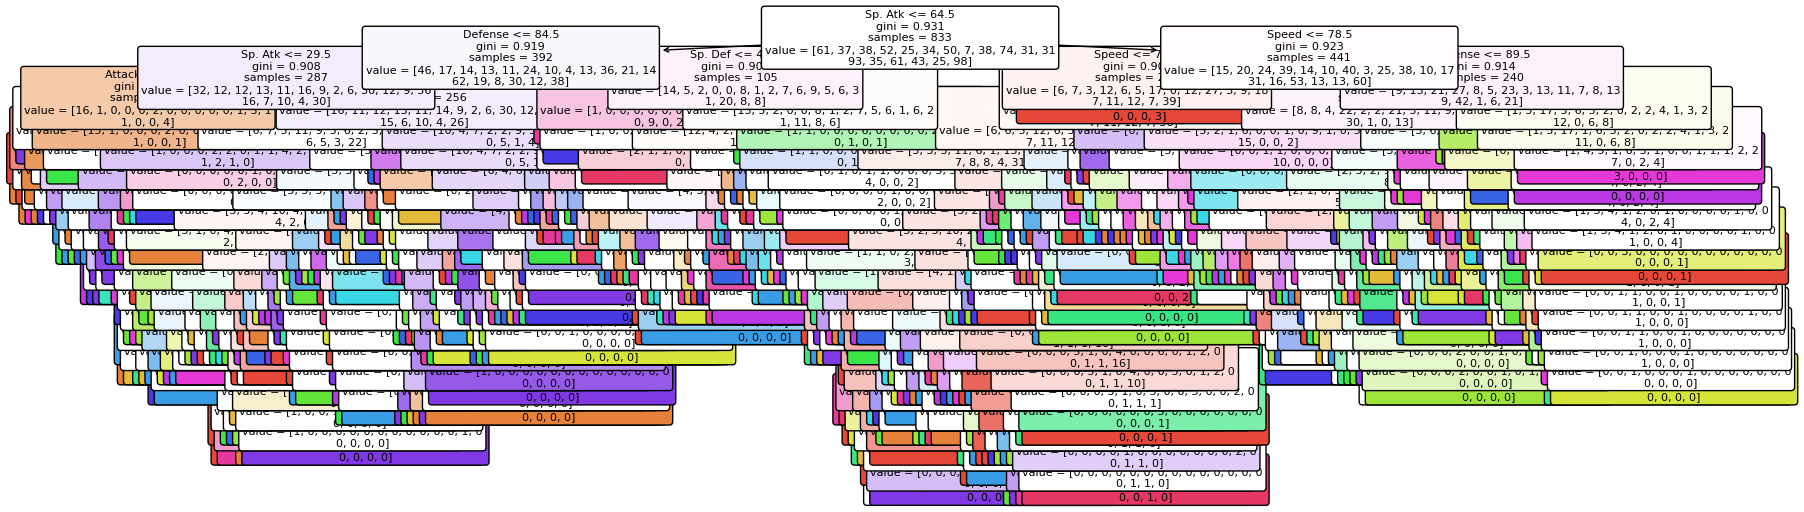

In [87]:
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

#### Evaluamos el accuracy en el conjunto de entrenamieto y en de test

In [88]:
#Evaluo el rendimiento del modelo
train_accuracy = accuracy_score(y_train_pokemon, predictions_train)
test_accuracy = accuracy_score(y_test_pokemon, predictions_test)
print('Accuracy en train: ', train_accuracy)
print('Accuracy en test: ', test_accuracy)

Accuracy en train:  0.9747899159663865
Accuracy en test:  0.1484593837535014


Claramente hay overfitting porque el accuracy del train es mucho mas grande que el de test, para corregir un poco eso aplicamos la optimización de hiperparámetros

#### Optimizacion de hiperparámetros

In [89]:
# max_depth: La profundidad máxima del árbol.
# min_samples_split: El número mínimo de muestras necesarias para dividir un nodo interno.
# min_samples_leaf: Número mínimo de observaciones en un nodo hoja (por separación)
# criterion: Criterio de separación ('gini' o 'entropy')
# random_state: Semilla para la generación de números aleatorios.

param_grid = {
    'max_depth': [6,7, 9, 10],
    'min_samples_split':[2,4],
    'min_samples_leaf': [2,5,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [4570]
}
#usamos grid search pq en este caso tarda muy poco y nos aseguramos de llegar al optimo global
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
grid_search.fit(X_train_pokemon, y_train_pokemon)
first_best_params = grid_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria

best_prediction = grid_search.predict(X_test_pokemon) #Entrenamos el modelo con estos hiperparametros

test_accuracy = accuracy_score(y_test_pokemon, best_prediction)

print(f'{first_best_params} \n {test_accuracy}')

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 4570} 
 0.18487394957983194


#### Árboles de decisión (Clasificación) optimizado


In [106]:
clf_ho = tree.DecisionTreeClassifier(
    criterion='entropy',         # Criterio de separación ('gini' o 'entropy')
    max_depth=6,             # Profundidad máxima del árbol
    min_samples_leaf=2,       # Número mínimo de observaciones en un nodo hoja
    min_samples_split=2,      # Número mínimo de observaciones para dividir un nodo
    random_state = 4570      # Semilla para la generación de números aleatorios
)

#Entreno el modelo pasando las características de entrenamiento (X_train_pokemon) y las etiquetas de entrenamiento correspondientes (y_train_pokemon).
decision_tree_ho = clf_ho.fit(X_train_pokemon, y_train_pokemon)

# Predicción en el conjunto de entrenamiento
predictions_train_ho = decision_tree_ho.predict(X_train_pokemon)

# Predicción en el conjunto de prueba
predictions_test_ho = decision_tree_ho.predict(X_test_pokemon)

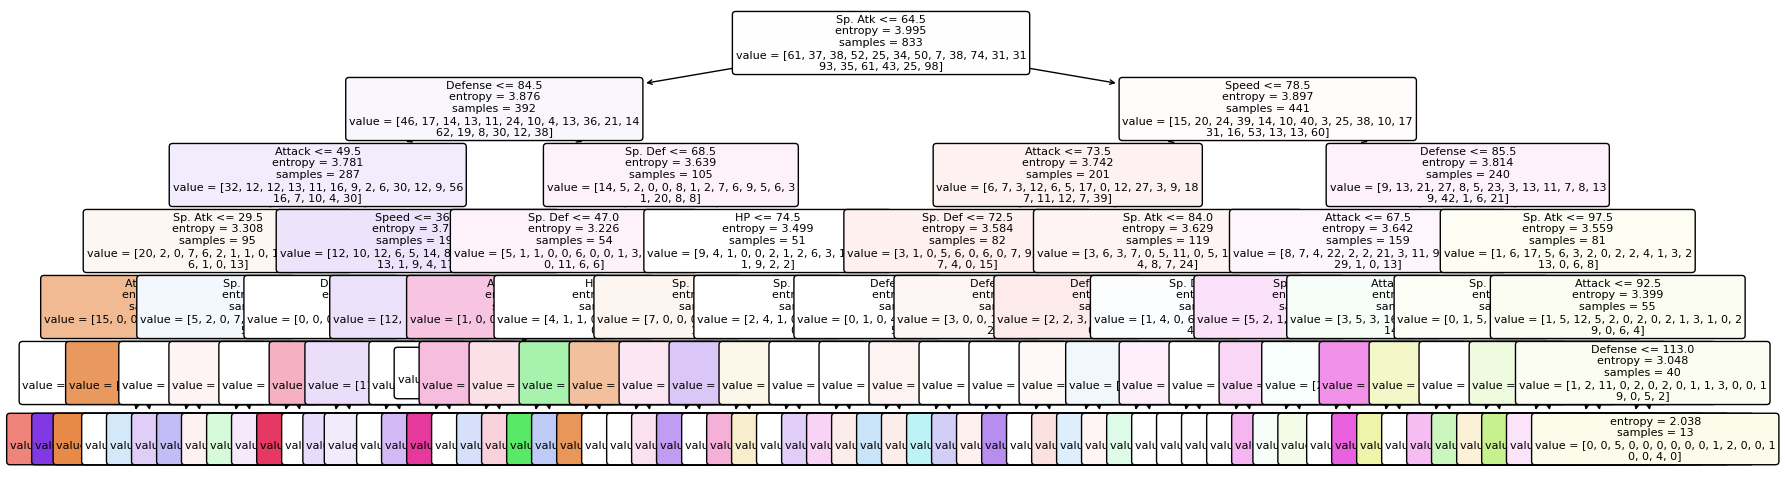

In [107]:
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree_ho,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Lo podamos en el nivel 4 para mejor interpretación

In [110]:
clf_pod = tree.DecisionTreeClassifier(
    criterion='gini',         # Criterio de separación ('gini' o 'entropy')
    max_depth=3,             # Profundidad máxima del árbol
    min_samples_leaf=2,       # Número mínimo de observaciones en un nodo hoja
    min_samples_split=2,      # Número mínimo de observaciones para dividir un nodo
    random_state = 4570      # Semilla para la generación de números aleatorios
)

decision_tree_pod = clf_pod.fit(X_train_pokemon, y_train_pokemon)

predictions_pod = decision_tree_pod.predict(X_test_pokemon)

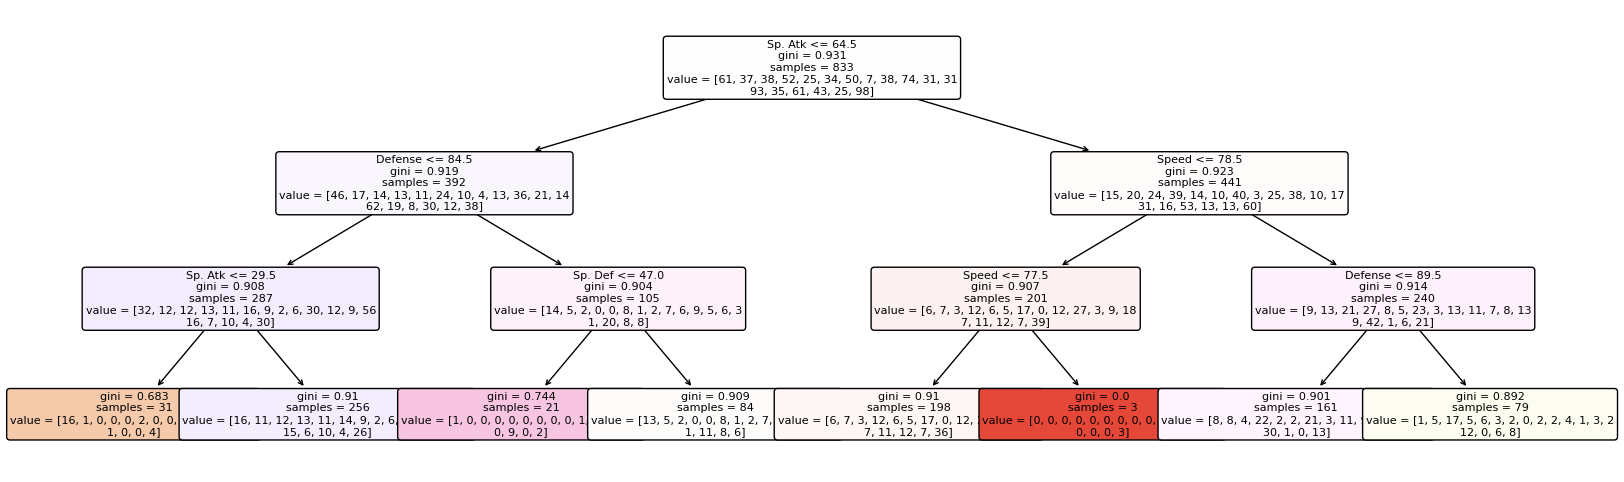

In [111]:
# Graficar el árbol podado
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree_pod,
                feature_names=feature_list,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

- **Gini**: Medida de impureza. La puntuación de Gini da una idea de lo buena que es una división midiendo lo mezcladas que están las clases en los dos grupos creados por la división. Por ejemplo en una de las 8 ultimas hojas, es decir, en uno de los ultimos 8 clusters tiene un gini = 0 lo qeu significa que es puro, por que solo tiene 3 valores de la misma categoria.
- **Sample**: El número de observaciones en el nodo.
- **Value**: La distribución de clases de las muestras en el nodo.


#### Observamos la importancia de cada atributo de Pokemon DB

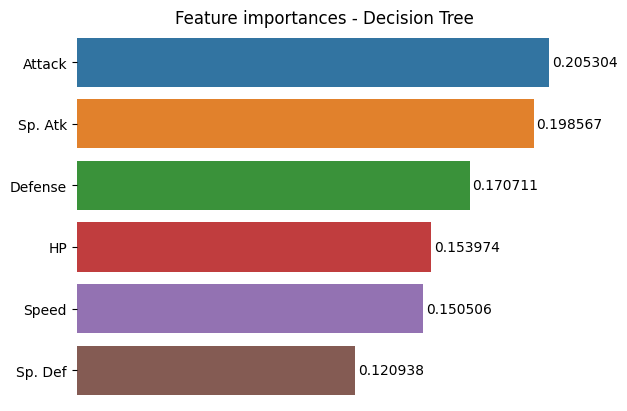

In [94]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': decision_tree_ho.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', hue ='features', legend=False)
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

vemos que la variable Sp. Atk es un poco mas importante que las otras, sin embargo Sp. Atk, Defense y Speed estan muy igualadas

#### Métricas de PokemonDB

In [112]:
accuracy = accuracy_score(y_test_pokemon, predictions_test_ho)
precision = precision_score(y_test_pokemon, predictions_test_ho, average='weighted', zero_division=0)
recall = recall_score(y_test_pokemon, predictions_test_ho, average='weighted')

print(f'Accuracy: {accuracy}')
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.18487394957983194
Precision: 0.169020133076933
Recall: 0.18487394957983194


**Exactitud (Accuracy)**
La exactitud es la proporción de predicciones correctas sobre el total de predicciones realizadas. En este caso, la exactitud del modelo es de aproximadamente 18.5%. Esto significa que el modelo predice correctamente el tipo de Pokémon en solo el 18.5% de los casos. Una exactitud baja sugiere que el modelo tiene dificultades para clasificar correctamente la mayoría de las instancias.

**Precisión (Precision)**
La precisión es la proporción de verdaderos positivos sobre el total de positivos predichos. En otras palabras, mide la exactitud de las predicciones positivas. Con una precisión de aproximadamente 16.9%, el modelo tiene un alto número de falsos positivos en comparación con los verdaderos positivos. Esto indica que cuando el modelo predice una cierta clase de tipo de Pokémon, solo en el 16.9% de los casos esa predicción es correcta.

**Exhaustividad (Recall)**
La exhaustividad es la proporción de verdaderos positivos sobre el total de positivos reales. En este modelo, la exhaustividad es de aproximadamente 18.5%, lo que significa que el modelo identifica correctamente el 18.5% de las instancias de la clase real. Una baja exhaustividad sugiere que el modelo no es efectivo para identificar todas las instancias positivas, lo que puede ser crítico dependiendo del caso de uso.

#### Matriz de confusión

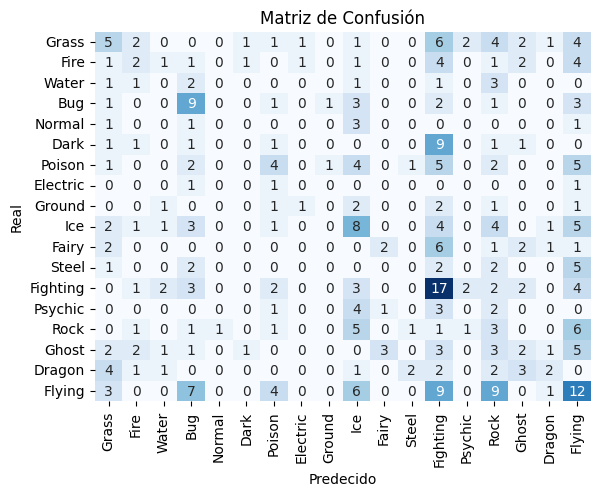

In [113]:
# Calculamos la matriz de confusión
con_mat = confusion_matrix(y_test_pokemon, predictions_test_ho)

sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

La matriz compara los valores objetivo reales con los predichos por el modelo de aprendizaje automático, con filas que representan la clase real y columnas que representan la clase predicha.

Esta visualización es importante porque proporciona información sobre qué tan bien un modelo está prediciendo en diferentes clases y puede ayudar a identificar qué clases se están confundiendo con otras.


# Actividad 5
Realizar la estimación del atributo Type utilizando Bayes Ingenuo. Aquí deberá
considerar un criterio de división de los atributos para discretizarlos. Mostrar los
resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud)

In [114]:
# Convertir las columnas a categóricas
PokemonDB['HP'] = pd.Categorical(PokemonDB['HP'])
PokemonDB['Attack'] = pd.Categorical(PokemonDB['Attack'])
PokemonDB['Defense'] = pd.Categorical(PokemonDB['Defense'])
PokemonDB['Sp. Atk'] = pd.Categorical(PokemonDB['Sp. Atk'])
PokemonDB['Sp. Def'] = pd.Categorical(PokemonDB['Sp. Def'])
PokemonDB['Speed'] = pd.Categorical(PokemonDB['Speed'])

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder a las columnas categóricas
PokemonDB['HP'] = label_encoder.fit_transform(PokemonDB['HP'])
PokemonDB['Attack'] = label_encoder.fit_transform(PokemonDB['Attack'])
PokemonDB['Defense'] = label_encoder.fit_transform(PokemonDB['Defense'])
PokemonDB['Sp. Atk'] = label_encoder.fit_transform(PokemonDB['Sp. Atk'])
PokemonDB['Sp. Def'] = label_encoder.fit_transform(PokemonDB['Sp. Def'])
PokemonDB['Speed'] = label_encoder.fit_transform(PokemonDB['Speed'])

In [115]:
X_pokemon = PokemonDB.drop('Type', axis=1)
y_pokemon = PokemonDB['Type']

## Entrenamiento 80% y Test 20%

In [128]:
# Dividimos los datos en entrenamiento (80%) y test (20%)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_pokemon, y_pokemon, test_size=0.2, random_state=4570)

In [129]:
mnb = MultinomialNB()
mnb.fit(X_train_B, y_train_B)

MultinomialNB()

In [130]:
predictions = mnb.predict(X_test_B)

### Métricas

In [131]:
accuracy = accuracy_score(y_test_B, predictions)
precision = precision_score(y_test_B, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test_B, predictions, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.15546218487394958
Precision:  0.15598801813334687
Recall:  0.15546218487394958


- Accuracy del arbol: 0176
- Accuracy bayes: 0.155

El accuracy dio mas bajo que para el árbol de decisión

### Matriz de confusión

<Figure size 800x600 with 0 Axes>

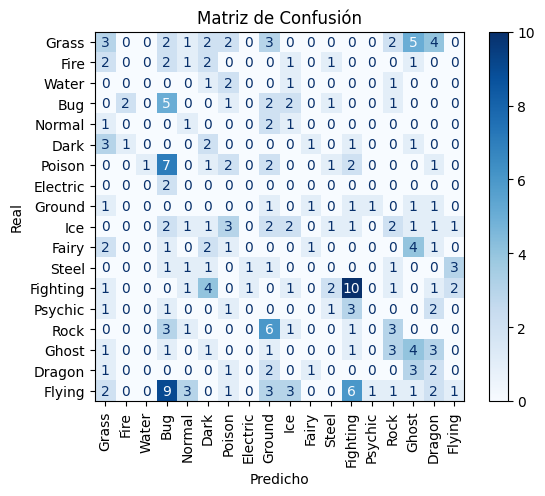

In [137]:
# Calculamos la matriz de confusión
cm_mnb = metrics.confusion_matrix(y_test_B, predictions)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=etiquetas)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Matriz de Confusión")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Podemos ver en la matriz de confusión que en este caso, a diferencia del árbol de clasificación, las categorías que tienen mayor true positive son Bug  y Fighting.

## Entrenamiento 70% y Test 30%

In [138]:
# Dividimos los datos en entrenamiento (70%) y test (30%)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_pokemon, y_pokemon, test_size=0.3, random_state=4570)

In [139]:
mnb = MultinomialNB()
mnb.fit(X_train_B, y_train_B)

MultinomialNB()

In [140]:
predictions = mnb.predict(X_test_B)

### Métricas

In [141]:
accuracy = accuracy_score(y_test_B, predictions)
precision = precision_score(y_test_B, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test_B, predictions, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.15126050420168066
Precision:  0.13858038619972926
Recall:  0.15126050420168066


### Matriz de confusión

<Figure size 800x600 with 0 Axes>

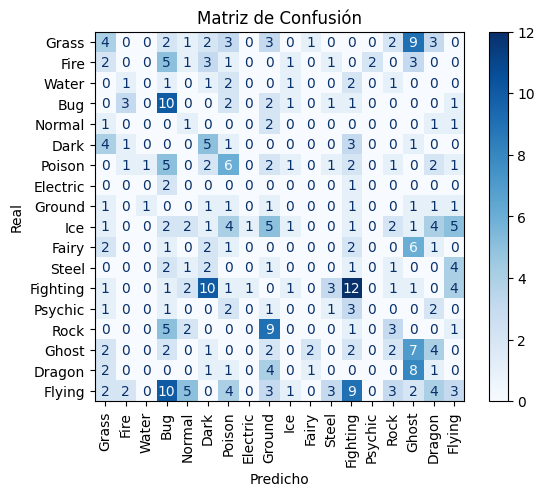

In [142]:
# Calculamos la matriz de confusión
cm_mnb = metrics.confusion_matrix(y_test_B, predictions)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=etiquetas)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Matriz de Confusión")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Mirando la matriz podemos decir que en la diagonal acierta con algunos valores, sin embargo ciertas categorías tienen muchos registros con malas predicciones como por ejemplo, predijo 10 con Dark y eran Fighting, 9 con Ground y eran Rock.

Si comparamos el accuracy del test de 20% y el test de 30% vemos que el de 20% de prueba es casi igual al 30% ya que:

- 20% es: 0.155.
- 30% es: 0.151.

Sin embargo, ambos modelos son malos ya que en ambos casos menos del 16% de los registros fueron categorizados correctamente.

# Actividad 6
Realizar la estimación del atributo Type utilizando k-NN analizando los parámetros
cantidad de vecinos, métrica y valor de p. Mostrar los resultados sobre un conjunto de
test (Precisión, Exhaustividad y Exactitud).

In [146]:
# Dividimos los datos en entrenamiento (80%) y test (20%)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_pokemon, y_pokemon, test_size=0.2, random_state=4570)

In [147]:
# Inicializar el clasificador KNN
knn_model_GSCV = KNeighborsClassifier()

# Definir los parámetros a ajustar
parametros_grid = {'n_neighbors':  range(1, 15, 2),
                   'p':[1,2,3],
                   'weights': ['uniform', 'distance'],
                   }

# Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(estimator = knn_model_GSCV,
                           param_grid = parametros_grid,
                           cv=5,
                           scoring='accuracy')

In [148]:
# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train_B, y_train_B)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
mejor_modelo = grid_search.best_estimator_
# Realizar predicciones en el conjunto de prueba
pred = mejor_modelo.predict(X_test_B)

Mejores hiperparámetros: {'n_neighbors': 13, 'p': 3, 'weights': 'distance'}


In [149]:
accuracy = accuracy_score(y_test_B, pred)
precision = precision_score(y_test_B, pred, average='weighted', zero_division=0)
recall = recall_score(y_test_B, pred, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.226890756302521
Precision:  0.24809165195068875
Recall:  0.226890756302521


<Figure size 800x600 with 0 Axes>

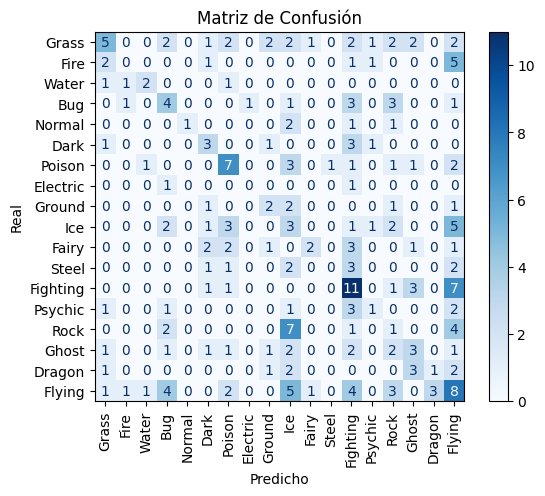

In [150]:
# Calculamos la matriz de confusión
cm_mnb = metrics.confusion_matrix(y_test_B, pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=etiquetas)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Matriz de Confusión")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

La exactitud del modelo mejoro con respecto de bayes ya que es de 22.7% (Accuracy) sin embargo sigue siendo bastante mala ya que solo clasifica correctamente menso del el 23% de mis datos de prueba.

# Conclusión PokemonBD

En conclusiones generales:

- El mejor accuracy nos lo dio de k-nn con un 22.7%
- El dataset esta desbalanceado y es el principal causante de este mal rendimiento de nuestro datos.
- Es casi lo mismo dividir el test y train 80-20 que 70-30.
